# Mutation Datasets Preprocessing

This notebook preprocesses five mutation variant datasets for downstream analysis. For each dataset, we extract coding sequence (CDS) context from reference genome annotations, annotate variants with transcript information, codon changes, and amino acid translations, and save the processed data in a standardized format.

---
## 📋 Table of Contents

1. **[DDD / ASD Dataset](#1-ddd-asd-dataset)** - Developmental disorder and autism spectrum disorder variants (hg19)
2. **[ClinVar AlphaMissense](#2-clinvar-alphamissense-dataset)** - ClinVar missense variants with AlphaMissense scores (hg38)
3. **[Cancer Hotspot](#3-cancer-hotspot)** - Cancer hotspot mutations with AlphaMissense annotations (hg38)
4. **[ClinVar Synonymous](#4-clinvar-synonymous)** - ClinVar synonymous variants with conservation features (hg38)
5. **[CHD Missense Dataset](#5-chd-missense-dataset)** - Congenital heart disease rare mutations with DDD/ASD controls (hg19)
6. **[COSMIC Synonymous](#6-cosmic-synonymous-analyses-data)** - COSMIC synonymous analyses data (hg38)
   - **[COSMIC](#cosmic)** - COSMIC mutant census variants
   - **[gnomAD Common Variants](#gnomad-common-variants)** - gnomAD common variants for comparison

---

## Required Pre-processing Steps

Before generation the mutation sequences for zero-shot benchmarks, ensure that the following files are downloaded/processed.

### 1. Open-source Data Download

There are two ways to obtain the data used by this notebook:

a. **Manual:**
   - Use the links provided above to download each file individually.
   - Use the [UCSC Table Browser](https://genome.ucsc.edu/cgi-bin/hgTables) to export the required tables as TSV.
   - Save them into the corresponding subdirectories under `DATA_DIR` (matching the filenames in the directory structure section above).

b. **Automatic (recommended):**
   - Create a UCSC account: [hgLogin](https://genome.ucsc.edu/cgi-bin/hgLogin)
   - Generate an API key: [hgHubConnect](https://genome.ucsc.edu/cgi-bin/hgHubConnect) → click **"generate key"**
   - Paste the key into `UCSC_API_KEY` in the download cell below, then run the cell.

#### 1.a. Manual Download - Reference Files
| File | Origin |
|----------------|-------- |
| `hg19.fa` | [Download](https://hgdownload.soe.ucsc.edu/goldenPath/hg19/bigZips/hg19.fa.gz) |
| `hg38.fa` | [Download](https://hgdownload.soe.ucsc.edu/goldenPath/hg38/bigZips/hg38.fa.gz) |

##### Annotation Files

| Annotation File | Origin | Table |
|----------------|--------|-------|
| `gencode.v47lift37.basic.annotation.gtf` | [GENCODE Release 47lift37](https://www.gencodegenes.org/human/release_47lift37.html) | - |
| `ucsc_gencodev32_hg38.tsv` | [UCSC Table Browser](https://genome.ucsc.edu/cgi-bin/hgTables) | `wgEncodeGencodeCompV32` |
| `ucsc_refseq_hg38.tsv` | [UCSC Table Browser](https://genome.ucsc.edu/cgi-bin/hgTables) | `ncbiRefSeq` |
| `ucsc_refseq_hist_hg38.tsv` | [UCSC Table Browser](https://genome.ucsc.edu/cgi-bin/hgTables) | `ncbiRefSeqHistorical` |

##### Variant Files

| Variant File | Source | URL | Notes |
|--------------|--------|-----|-------|
| `asd_discov` | [Zhou et al. 2022](https://www.nature.com/articles/s41588-022-01148-2) | [Download](https://static-content.springer.com/esm/art%3A10.1038%2Fs41588-022-01148-2/MediaObjects/41588_2022_1148_MOESM5_ESM.xlsx) | Supplementary Table 5 |
| `asd_rep` | [Zhou et al. 2022](https://www.nature.com/articles/s41588-022-01148-2) | [Download](https://static-content.springer.com/esm/art%3A10.1038%2Fs41588-022-01148-2/MediaObjects/41588_2022_1148_MOESM6_ESM.xlsx) | Supplementary Table 6 |
| `ddd_other` | [Zhou et al. 2022](https://www.nature.com/articles/s41588-022-01148-2) | [Download](https://static-content.springer.com/esm/art%3A10.1038%2Fs41588-022-01148-2/MediaObjects/41588_2022_1148_MOESM7_ESM.xlsx) | Supplementary Table 7 |
| `AlphaMissense ClinVar` | [Cheng et al. 2023](https://www.science.org/doi/10.1126/science.adg7492) | [Download](https://www.science.org/doi/suppl/10.1126/science.adg7492/suppl_file/science.adg7492_data_s1_to_s9.zip) | Data S5 |
| `AlphaMissense CancerHotspot` | [Cheng et al. 2023](https://www.science.org/doi/10.1126/science.adg7492) | [Download](https://www.science.org/doi/suppl/10.1126/science.adg7492/suppl_file/science.adg7492_data_s1_to_s9.zip) | Data S6 |
| `chd_rare_mutation.csv` | [Jin et al. 2017](https://pmc.ncbi.nlm.nih.gov/articles/PMC5675000/) | [Download](https://pmc.ncbi.nlm.nih.gov/articles/instance/5675000/bin/NIHMS906719-supplement-supp_datasets.xlsx) | Table S9 |
| `chd_mutation_ctrl.csv` | [Jin et al. 2017](https://pmc.ncbi.nlm.nih.gov/articles/PMC5675000/) | [Download](https://pmc.ncbi.nlm.nih.gov/articles/instance/5675000/bin/NIHMS906719-supplement-supp_datasets.xlsx) | Table S10 |
| `Cosmic_Sample_v102_GRCh38.tsv.gz` | [COSMIC](https://cancer.sanger.ac.uk/cosmic) | [Download](https://cancer.sanger.ac.uk/cosmic/download) | Requires registration |
| `Cosmic_MutantCensus_v102_GRCh38.tsv.gz` | [COSMIC](https://cancer.sanger.ac.uk/cosmic) | [Download](https://cancer.sanger.ac.uk/cosmic/download) | Requires registration |
| `gnomad.exomes.v4.1/{chrom}.tsv.gz` | [gnomAD v4.1](https://gnomad.broadinstitute.org/) | [Download](https://gnomad.broadinstitute.org/downloads#v4) | Per-chromosome TSV files |
| `gnomad.genomes.v4.1/{chrom}.tsv.gz` | [gnomAD v4.1](https://gnomad.broadinstitute.org/) | [Download](https://gnomad.broadinstitute.org/downloads#v4) | Per-chromosome TSV files |

##### ClinVar Synonymous Matching Features

| File | Source | URL |
|------|--------|-----|
| `hg38.phyloP447way.bw` | UCSC Genome Browser | [Download](https://hgdownload.soe.ucsc.edu/goldenPath/hg38/phyloP447way/hg38.phyloP447way.bw) |
| `hg19.100way.phyloP100way.bw` | UCSC Genome Browser | [Download](https://hgdownload.soe.ucsc.edu/goldenPath/hg19/phyloP100way/hg19.100way.phyloP100way.bw) |
| `ucsc_pliByGene_hg38.tsv` | UCSC Genome Browser → Table Browser | [Download](https://genome.ucsc.edu/cgi-bin/hgTables) (table: `pliByGene`) |
| `gnomad.v2.1.1.lof_metrics.by_transcript.txt` | gnomAD | [Download](https://gnomad.broadinstitute.org/downloads) |
| `variant_summary.txt.gz` | NCBI ClinVar (FTP) | [Download](https://ftp.ncbi.nlm.nih.gov/pub/clinvar/tab_delimited/variant_summary.txt.gz) |


### 1.b. Automatic Download

If you choose **Automatic**:
  1. Set the `DATA_DIR` where the files should be saved.
  2. Set the `UCSC_API_KEY` to download the tables form the UCSC table browser.
  3. Run the next cell to download the required datasets into `DATA_DIR`.

In [ ]:
import gzip
import os
import shutil
import urllib.request

import pandas as pd
import requests


# ── Set data directory ───────────────────────────────────────
DATA_DIR = "/data/ncbi"  # <-- change this to your preferred data root
OUTPUT_DIR = "/data/for_paper/mutation_datasets"  # output directory where all processed datasets will be saved
UCSC_API_KEY = ""  # <-- set your UCSC API key for Table Browser downloads
# ─────────────────────────────────────────────────────────────

# Create output directory
os.makedirs(OUTPUT_DIR, exist_ok=True)

for subdir in [
    "reference/hg19",
    "reference/hg38",
    "alphamissense_data",
    "ddd_asd_zhouetal",
    "clinvar_syn",
]:
    os.makedirs(os.path.join(DATA_DIR, subdir), exist_ok=True)


def download_file(url, dest, decompress_gz=False):
    """Download *url* → *dest*, optionally gunzipping in place.  Skips if target already exists."""
    final = dest[:-3] if decompress_gz and dest.endswith(".gz") else dest
    if os.path.exists(final):
        print(f"  [skip] {os.path.relpath(final, DATA_DIR)}")
        return
    print(f"  Downloading → {os.path.relpath(final, DATA_DIR)} ...")
    urllib.request.urlretrieve(url, dest)
    if decompress_gz and dest.endswith(".gz"):
        with gzip.open(dest, "rb") as f_in, open(final, "wb") as f_out:
            shutil.copyfileobj(f_in, f_out)
        os.remove(dest)


# ── 1. Reference genomes ────────────────────────────────────
print("Reference genomes")
download_file(
    "https://hgdownload.soe.ucsc.edu/goldenPath/hg19/bigZips/hg19.fa.gz",
    os.path.join(DATA_DIR, "reference/hg19/hg19.fa.gz"),
    decompress_gz=True,
)
download_file(
    "https://hgdownload.soe.ucsc.edu/goldenPath/hg38/bigZips/hg38.fa.gz",
    os.path.join(DATA_DIR, "reference/hg38/hg38.fa.gz"),
    decompress_gz=True,
)

# ── 2. GENCODE annotation (GTF) ─────────────────────────────
print("GENCODE annotation")
download_file(
    "https://ftp.ebi.ac.uk/pub/databases/gencode/Gencode_human/release_47/GRCh37_mapping/gencode.v47lift37.basic.annotation.gtf.gz",
    os.path.join(DATA_DIR, "gencode.v47lift37.basic.annotation.gtf.gz"),
    decompress_gz=True,
)

# ── 3. DDD / ASD variant files (Zhou et al. 2022, xlsx → csv)
print("DDD / ASD variant files")
xlsx_sources = {
    "asd_discov": "https://static-content.springer.com/esm/art%3A10.1038%2Fs41588-022-01148-2/MediaObjects/41588_2022_1148_MOESM5_ESM.xlsx",
    "asd_rep": "https://static-content.springer.com/esm/art%3A10.1038%2Fs41588-022-01148-2/MediaObjects/41588_2022_1148_MOESM6_ESM.xlsx",
    "ddd_other": "https://static-content.springer.com/esm/art%3A10.1038%2Fs41588-022-01148-2/MediaObjects/41588_2022_1148_MOESM7_ESM.xlsx",
}

for name, url in xlsx_sources.items():
    csv_path = os.path.join(DATA_DIR, "ddd_asd_zhouetal", f"{name}.csv")
    if os.path.exists(csv_path):
        print(f"  [skip] ddd_asd_zhouetal/{name}.csv")
        continue
    xlsx_path = csv_path.replace(".csv", ".xlsx")
    download_file(url, xlsx_path)
    print(f"  Converting {name}.xlsx → csv ...")
    pd.read_excel(xlsx_path).to_csv(csv_path, index=False)

# ── 4. ClinVar variant summary ──────────────────────────────
print("ClinVar variant summary")
download_file(
    "https://ftp.ncbi.nlm.nih.gov/pub/clinvar/tab_delimited/variant_summary.txt.gz",
    os.path.join(DATA_DIR, "clinvar_syn/variant_summary.txt.gz"),
)

# ── 5. phyloP conservation scores ───────────────────────────
print("phyloP447way conservation scores")
download_file(
    "https://hgdownload.soe.ucsc.edu/goldenPath/hg38/phyloP447way/hg38.phyloP447way.bw",
    os.path.join(DATA_DIR, "hg38.phyloP447way.bw"),
)

# ── 6. UCSC Table Browser downloads ─────────────────────────
UCSC_URL = "https://genome.ucsc.edu/cgi-bin/hgTables"
UCSC_TABLES = {
    "wgEncodeGencodeCompV32": {
        "filename": "ucsc_gencodev32_hg38.tsv",
        "subdir": "",
        "form": {
            "hgsid": "3727160771_KywqrMbVutzoVUyr47py53TcxZMg",  # pragma: allowlist secret
            "clade": "mammal",
            "org": "Human",
            "db": "hg38",
            "hgta_group": "allTables",
            "hgta_track": "hg38",
            "hgta_table": "wgEncodeGencodeCompV32",
            "hgta_regionType": "genome",
            "position": "chr7:155,799,529-155,812,871",
            "hgta_outSep": "tab",
            "hgta_doTopSubmit": "Get output",
        },
    },
    "ncbiRefSeq": {
        "filename": "ucsc_refseq_hg38.tsv",
        "subdir": "clinvar_syn",
        "form": {
            "hgsid": "3727549177_A4TjXykIK1JRVnpjZ0HKtMVnKWw0",  # pragma: allowlist secret
            "clade": "mammal",
            "org": "Human",
            "db": "hg38",
            "hgta_group": "allTables",
            "hgta_track": "hg38",
            "hgta_table": "ncbiRefSeq",
            "hgta_regionType": "genome",
            "position": "chr7:155,799,529-155,812,871",
            "hgta_outSep": "tab",
            "hgta_doTopSubmit": "Get output",
        },
    },
    "ncbiRefSeqHistorical": {
        "filename": "ucsc_refseq_hist_hg38.tsv",
        "subdir": "clinvar_syn",
        "form": {
            "hgsid": "3727803393_8Oali1duOyVJT7DtAateRwtkg7Y0",  # pragma: allowlist secret
            "clade": "mammal",
            "org": "Human",
            "db": "hg38",
            "hgta_group": "allTables",
            "hgta_track": "hg38",
            "hgta_table": "ncbiRefSeqHistorical",
            "hgta_regionType": "genome",
            "position": "chr7:155,799,529-155,812,871",
            "hgta_outSep": "tab",
            "hgta_doTopSubmit": "Get output",
        },
    },
    "pliByGene": {
        "filename": "ucsc_pliByGene_hg38.tsv",
        "subdir": "",
        "form": {
            "hgsid": "3727823409_x06fwXO5XFeWrbFjKlSQTfU3I6F3",  # pragma: allowlist secret
            "clade": "mammal",
            "org": "Human",
            "db": "hg38",
            "hgta_group": "varRep",
            "hgta_track": "gnomadPLI",
            "hgta_table": "pliByGene",
            "hgta_regionType": "genome",
            "position": "chr7:155,799,529-155,812,871",
            "hgta_outSep": "tab",
            "hgta_doTopSubmit": "Get output",
        },
    },
}

print("UCSC Table Browser downloads")
if not UCSC_API_KEY:
    print("  UCSC_API_KEY is not set — skipping automatic download.")
    print("  Download these tables manually from https://genome.ucsc.edu/cgi-bin/hgTables:")
    for tbl_name, tbl_cfg in UCSC_TABLES.items():
        dest_dir = os.path.join(DATA_DIR, tbl_cfg["subdir"]) if tbl_cfg["subdir"] else DATA_DIR
        dest = os.path.join(dest_dir, tbl_cfg["filename"])
        status = "found" if os.path.exists(dest) else "MISSING"
        rel = os.path.join(tbl_cfg["subdir"], tbl_cfg["filename"]) if tbl_cfg["subdir"] else tbl_cfg["filename"]
        print(f"    [{status}] {rel}  (table: {tbl_name})")
else:
    for tbl_name, tbl_cfg in UCSC_TABLES.items():
        dest_dir = os.path.join(DATA_DIR, tbl_cfg["subdir"]) if tbl_cfg["subdir"] else DATA_DIR
        os.makedirs(dest_dir, exist_ok=True)
        dest = os.path.join(dest_dir, tbl_cfg["filename"])

        if os.path.exists(dest):
            print(f"  [skip] {os.path.relpath(dest, DATA_DIR)}")
            continue

        print(f"  Downloading {tbl_name} → {os.path.relpath(dest, DATA_DIR)} ...")
        form = {**tbl_cfg["form"], "apiKey": UCSC_API_KEY}
        resp = requests.post(UCSC_URL, data=form, timeout=300)
        resp.raise_for_status()

        if "<!-- HGERROR-START -->" in resp.text:
            raise RuntimeError(f"UCSC returned an error for {tbl_name}. Re-run the cell to retry.")

        lines = resp.text.splitlines(keepends=True)
        while lines:
            tail = lines[-1].strip()
            if not tail or tail.startswith("---") or "cookie" in tail.lower():
                lines.pop()
            else:
                break

        with open(dest, "w") as f:
            f.writelines(lines)
        print(f"  [done] {os.path.relpath(dest, DATA_DIR)}  ({len(lines):,} lines)")

print("\nDone.")

### 2. Download AlphaMissense Data

The **AlphaMissense** data can only be downloaded manually due to the webiste's bot protection. [Download the zip file](https://www.science.org/doi/suppl/10.1126/science.adg7492/suppl_file/science.adg7492_data_s1_to_s9.zip) in the `DATA_DIR/alphamissense_data` and run the next cell:

In [ ]:
import zipfile


print("AlphaMissense data")

am_data_dir = os.path.join(DATA_DIR, "alphamissense_data")
am_zip_path = os.path.join(am_data_dir, "science.adg7492_data_s1_to_s9.zip")
am_clinvar_path = os.path.join(am_data_dir, "alphamissense_clinvar.csv")
am_hotspot_path = os.path.join(am_data_dir, "alphamissense_cancer_hotspot.csv")

if not os.path.exists(am_zip_path):
    raise FileNotFoundError(
        f"Required file not found: {am_zip_path}\n"
        "Please manually download science.adg7492_data_s1_to_s9.zip into DATA_DIR/alphamissense_data/."
    )

with zipfile.ZipFile(am_zip_path, "r") as zf:
    print(f"  Extracting zip → {zf.namelist()}")
    zf.extractall(am_data_dir)

rename_map = {
    "science.adg7492_data_s5.csv": am_clinvar_path,
    "science.adg7492_data_s6.csv": am_hotspot_path,
}

for src_name, dst_path in rename_map.items():
    src_path = os.path.join(am_data_dir, src_name)
    if os.path.exists(src_path):
        os.replace(src_path, dst_path)
        print(f"  Renamed {src_name} -> {os.path.basename(dst_path)}")
    elif os.path.exists(dst_path):
        print(f"  [skip] {os.path.basename(dst_path)} already present")
    else:
        raise FileNotFoundError(f"Expected file not found after extraction: {src_path}")

### 3. Data Scripts

Before running this notebook, ensure the following preprocessing scripts have been executed:

| File | Purpose | How to Generate |
|------|---------|-----------------|  
| `codon_counts_nopathogen.json` | Codon counts by taxonomic group (used for codon frequency features) | Run `python data_scripts/check_codon_frequency.py` after completing NCBI preprocessing in `data_scripts/data_curation/`. Place or symlink the produced file at `/data/ncbi/codon_counts_nopathogen.json`. |
| `gencode.v47lift37.basic.annotation.processed.tsv` | Processed GTF annotation with CDS coordinates | Run `000-Annotation-File-Processing.ipynb` on the downloaded GENCODE GTF file `gencode.v47lift37.basic.annotation.gtf`. |
| `gencode.v47.basic.annotation.processed.filtered.tsv` | Filtered transcripts with CDS sequences (hg38) | Run `000-Annotation-File-Processing.ipynb` Part 1 on the GENCODE v47 GTF file. |

---

### 4. Downloaded Data Integrity Check

Run the following cell to ensure that the `DATA_DIR` path structure (containing the files from the required pre-processing step) is in place:

```
📁 DATA_DIR/
├── 📁 alphamissense_data/
│   ├── AlphaMissense_hg19.tsv.gz
│   ├── alphamissense_cancer_hotspot.csv
│   └── alphamissense_clinvar.csv
├── 📁 ddd_asd_zhouetal/
│   ├── asd_discov.csv
│   ├── asd_rep.csv
│   └── ddd_other.csv
├── 📁 clinvar_syn/
│   └── variant_summary.txt.gz
├── 📁 reference/
│   ├── 📄 gencode.v47lift37.basic.annotation.processed.tsv
│   ├── 📄 gencode.v47.basic.annotation.processed.filtered.tsv
│   ├── 📄 ucsc_gencodev32_hg38.tsv
│   ├── 📄 ucsc_pliByGene_hg38.tsv
│   ├── 📄 hg38.phyloP447way.bw
│   ├── ucsc_refseq_hg38.tsv
│   ├── ucsc_refseq_hist_hg38.tsv
│   ├── hg19/
│   │   ├── hg19.fa
│   │   └── hg19.fa.fai
│   └── hg38/
│       ├── hg38.fa
│       └── hg38.fa.fai
├── 📄 codon_counts_nopathogen.json
├── 📁 cosmic/
│   └── 📁 cosmic_raw/
│       ├── Cosmic_Sample_v102_GRCh38.tsv.gz
│       └── Cosmic_MutantCensus_v102_GRCh38.tsv.gz
└── 📁 gnomad/
    ├── 📁 gnomad.exomes.v4.1/
    │   └── {chrom}.tsv.gz  (chr1-22, chrX, chrY)
    └── 📁 gnomad.genomes.v4.1/
        └── {chrom}.tsv.gz  (chr1-22, chrX, chrY)
```

In [ ]:
expected_files = [
    "alphamissense_data/AlphaMissense_hg19.tsv.gz",
    "alphamissense_data/alphamissense_cancer_hotspot.csv",
    "alphamissense_data/alphamissense_clinvar.csv",
    "ddd_asd_zhouetal/asd_discov.csv",
    "ddd_asd_zhouetal/asd_rep.csv",
    "ddd_asd_zhouetal/ddd_other.csv",
    "clinvar_syn/variant_summary.txt.gz",
    "clinvar_syn/ucsc_refseq_hg38.tsv",
    "clinvar_syn/ucsc_refseq_hist_hg38.tsv",
    "reference/hg19/hg19.fa",
    "reference/hg19/hg19.fa.fai",
    "reference/hg38/hg38.fa",
    "reference/hg38/hg38.fa.fai",
    "codon_counts_nopathogen.json",
    "gencode.v47lift37.basic.annotation.processed.tsv",
    "ucsc_gencodev32_hg38.tsv",
    "ucsc_pliByGene_hg38.tsv",
    "hg38.phyloP447way.bw",
]

missing = [f for f in expected_files if not os.path.exists(os.path.join(DATA_DIR, f))]
if missing:
    print(f"{len(missing)} file(s) missing from {DATA_DIR}:")
    for f in missing:
        print(f"  ✗ {f}")
    raise FileNotFoundError(f"{len(missing)} required file(s) missing — see list above.")
else:
    print(f"All {len(expected_files)} required files found in {DATA_DIR}.")

# Imports and Paths setup

In [1]:
# Uncomment to install PyBigWig
# !pip install  pyBigWig

In [3]:
import ast
import json
import os
import warnings

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import polars as pl
import pyBigWig
import pyfaidx
import seaborn as sns
from Bio.Data import CodonTable
from Bio.Seq import Seq
from matplotlib.ticker import LogLocator
from tqdm import tqdm


warnings.filterwarnings("ignore")

# 0. Utils

In [53]:
def translate(seq):
    """
    Translate an RNA sequence into a protein sequence.
    """
    protein = ""
    # Process the RNA sequence three nucleotides (codon) at a time.
    for i in range(0, len(seq) - 2, 3):
        codon = seq[i : i + 3]
        # Look up the codon in the genetic code dictionary.
        amino_acid = codon_to_aa(codon)
        protein += amino_acid if amino_acid is not None else "?"
    return protein


def codon_to_aa(codon):
    """
    Translate a single codon to its corresponding amino acid using BioPython's CodonTable.

    Parameters:
        codon (str): A 3-nucleotide DNA codon.

    Returns:
        str or None: The single-letter amino acid code, '*' for stop codons, or None if invalid.
    """
    standard_table = CodonTable.unambiguous_dna_by_name["Standard"]
    codon = codon.upper().replace("U", "T")
    if len(codon) != 3 or any(base not in "ATGC" for base in codon):
        return None
    if codon in standard_table.stop_codons:
        return "*"
    return standard_table.forward_table.get(codon, None)


def reverse_complement_dna(seq):
    """
    Return the reverse complement of a DNA sequence.

    Parameters:
        seq (str): A DNA sequence with uppercase letters only (e.g., "ATCG").

    Returns:
        str: The reverse complement DNA sequence.

    Raises:
        KeyError: If the sequence contains lowercase letters or invalid characters.
    """
    complement = {"A": "T", "T": "A", "G": "C", "C": "G", "N": "N"}
    return "".join(complement[base] for base in seq[::-1].upper())


def process_gtf(gtf_path, fasta_path):
    """
    Build coding sequences (CDS) for transcripts from a a gtf annotation file
    and a reference FASTA file.
    """
    gtf = pd.read_csv(gtf_path, sep="\t")
    if "#name" in gtf.columns:
        gtf = gtf.rename({"#name": "name"}, axis=1)
    gtf = (
        gtf.loc[gtf["cdsStart"] != gtf["cdsEnd"]].reset_index(drop=True).copy()
    )  # keep transcripts with a non‑empty coding region

    gtf["exonStarts_arr"] = gtf["exonStarts"].map(lambda x: ast.literal_eval(x))
    gtf["exonEnds_arr"] = gtf["exonEnds"].map(lambda x: ast.literal_eval(x))
    fasta = {}
    with pyfaidx.Fasta(fasta_path) as f:
        # Get available chromosomes in the FASTA file
        available_chroms = set(f.keys())
        # Filter GTF to only include chromosomes present in FASTA
        gtf_chroms = set(gtf["chrom"].unique())
        missing_chroms = gtf_chroms - available_chroms
        if missing_chroms:
            print(
                f"Warning: {len(missing_chroms)} chromosome(s) in GTF not found in FASTA, filtering them out: {sorted(missing_chroms)}"
            )
            gtf = gtf[gtf["chrom"].isin(available_chroms)].reset_index(drop=True).copy()
        # Load chromosome sequences
        for chrom in gtf["chrom"].unique():
            fasta[chrom] = f[chrom][
                :
            ].seq.upper()  #  load entire chrom sequence to uppercase and store in fasta[chrom] for fast slicing.
    cds_starts = []
    cds_ends = []
    lengths = []
    seqs = []
    for i in tqdm(
        range(gtf.shape[0]), desc="Processing transcripts", total=gtf.shape[0]
    ):  # loop through each transcript in the gtf file
        t = gtf.iloc[i]
        chrom = t["chrom"]
        cds_s = []
        cds_e = []
        cs, ce = t[["cdsStart", "cdsEnd"]]  # These are 0-based coordinates
        length = 0
        curr_seq = []
        for a, b in zip(t["exonStarts_arr"], t["exonEnds_arr"]):  # combine all exons regions for this transcript
            v1 = max(a, cs)  # clip exons to the coding region (ignore UTRs)
            v2 = min(b, ce)
            if v1 < v2:  # record the sequence string if it overlaps with the coding region
                cds_s.append(v1)
                cds_e.append(v2)
                length += v2 - v1
                curr_seq.append(fasta[chrom][v1:v2])
        # save the cds starts, ends, and length for this transcript
        cds_starts.append(tuple(cds_s))
        cds_ends.append(tuple(cds_e))
        lengths.append(length)
        # Get the joined CDS sequence in the forward direction (as it is build from the reference FASTA)
        curr_seq = "".join(curr_seq)
        if t["strand"] == "-":
            # reverse‑complement to get the seequence in the gene direction (5'→3')
            curr_seq = reverse_complement_dna(curr_seq)
        seqs.append(curr_seq)
    # Build the the processed transcript table with coding sequence information for each transcript
    gtf["cds_starts"] = cds_starts
    gtf["cds_ends"] = cds_ends
    gtf["cds_length"] = lengths
    gtf["cds"] = seqs  # sequence is strand-aware (always gene 5'->3')

    # remove version numbers from identifiers
    gtf["name"] = gtf["name"].str.split(".").str[0]

    # Build output columns - gene_id and gene_name are optional
    output_cols = ["name", "chrom", "strand", "cdsStart", "cdsEnd", "cds_starts", "cds_ends", "cds_length", "cds"]
    if "gene_name" in gtf.columns:
        output_cols.append("gene_name")
    if "gene_id" in gtf.columns:
        gtf["gene_id"] = gtf["gene_id"].str.split(".").str[0]
        output_cols.append("gene_id")

    gtf_s = gtf[output_cols].copy()
    # Sort transcripts by chromosome, start, and end coordinates, they're in the forward direction and 0-based.
    gtf_s = gtf_s.sort_values(by=["chrom", "cdsStart", "cdsEnd"]).reset_index(drop=True).copy()

    return gtf_s, fasta


def process_a_chrom(chrom_variants, chrom_refseq, return_alt_cds=False):
    """
    Annotate a single nucleotide variant with transcript CDS context.
        - Locate its position within the coding sequence (0-based coordinate),
        - extract the ref codon and build the alt codon,
        - translate codons to amino acids,
        - optionally, build the full alternate CDS with the mutation.

    ## Notes: The output columns are:
       - pos: 1-based (forward direction, genomic coordinates)
       - ref: genomic ref allele (as in the reference genome, forward orientation)
       - alt: genomic alt allele (as in the reference genome, forward orientation)
       - cdsStart: 0-based genomic start of CDS, half-open interval; genomic axis.
       - cdsEnd: 0-based genomic end of CDS, half-open interval; genomic axis.
       - var_rel_dist_in_cds: 0-based index within the CDS in transcript 5'->3' orientation (strand-aware).
       - ref_seq: full CDS string in transcript 5'->3' orientation
       - ref_codon: codon from ref_seq at the variant position; strand-aware.
       - alt_codon: codon after single-base change; strand-aware.
       - ref_aa: ref amino acid at the variant position
       - alt_aa: alt amino acid at the variant position
       - alt_seq (if set): full alt CDS after the single-base change, transcript 5'->3' orientation; strand-aware.
       - codon_position: 0-based codon index within CDS.

    """
    # normalize alleles;
    chrom_variants["ref"] = chrom_variants["ref"].str.upper()
    chrom_variants["alt"] = chrom_variants["alt"].str.upper()

    var_ids = chrom_variants["variant_id"].values
    var_pos = (
        chrom_variants["pos"].values - 1
    )  # Convert to 0-based - mutations are always reported in 1-based coordinates
    var_ref = chrom_variants["ref"].values  # reference allele
    var_alt = chrom_variants["alt"].values  # alternate allele
    chrom = chrom_refseq.iloc[0]["chrom"]

    # CDS processed using `process_gtf`` function
    cds_strands = chrom_refseq["strand"].values  # strand of the coding sequence
    cds_starts = chrom_refseq["cdsStart"].values
    cds_ends = chrom_refseq["cdsEnd"].values
    cds_lengths = chrom_refseq["cds_length"].values
    rec_cds_starts = chrom_refseq[
        "cds_starts"
    ].values  # List of exon starts within the CDS region for all transcripts.
    rec_cds_ends = chrom_refseq["cds_ends"].values  # List of exon ends within the CDS region for all transcripts.
    rec_cds = chrom_refseq["cds"].values  # CDS sequence - strand-aware (always gene 5'->3')
    rec_names = chrom_refseq["name"].values

    # Find transcripts (CDS regions)that overlap the variant position
    # sorted variant positions to find, per transcript,
    # var_pos[s1[j]:ss2[j]] includes all variants with pos in [cdsStart[j], cdsEnd[j]) for transcript j.
    s1 = np.searchsorted(var_pos, cds_starts, side="left")
    s2 = np.searchsorted(var_pos, cds_ends, side="right")
    results = []

    # Loop through each transcript j (CDS region) and get information for all overlapping variants.
    for j, (ss1, ss2) in enumerate(zip(s1, s2)):
        curr_starts = rec_cds_starts[j]  # CDS starts boundaries for transcript j.
        curr_ends = rec_cds_ends[j]  # CDS ends boundaries for transcript j.
        # Sanity checks on CDS sequence for this transcript
        assert cds_lengths[j] == len(rec_cds[j]), f"CDS length mismatch for {rec_names[j]}"
        assert cds_lengths[j] % 3 == 0, f"CDS length not multiple of 3 for {rec_names[j]}"
        if ss1 < ss2:
            for i in range(ss1, ss2):  # loop through all variants in the CDS region for transcript j.
                pos = var_pos[i]
                curr_ref = var_ref[i]
                curr_alt = var_alt[i]
                # Calculate offset in CDS sequence - translate a genomic coordinate into a CDS relativeindex.
                offset = 0
                bound = False
                for a, b in zip(curr_starts, curr_ends):
                    if pos >= b:  # if the variant is after the end of the exon
                        offset += b - a  # Add length of complete exon
                    elif a <= pos < b:
                        offset += pos - a
                        bound = True  # the variant is within this exon
                        break
                if bound:
                    if cds_strands[j] == "-":
                        # Handle reverse strand
                        offset = cds_lengths[j] - 1 - offset  # Convert to reverse strand position
                        ref_codon = rec_cds[j][offset // 3 * 3 : offset // 3 * 3 + 3]
                        # Check if the reference base in ref codon is the reverse complement of the variant reference allele from the reference FASTA.
                        assert rec_cds[j][offset] == reverse_complement_dna(curr_ref), f"-, {ref_codon} {var_ids[i]}"
                        # Build the alternate codon by replacing the reference base with the alternate allele.
                        alt_codon = (
                            ref_codon[: offset % 3] + reverse_complement_dna(curr_alt) + ref_codon[offset % 3 + 1 :]
                        )
                        results.append(
                            [
                                chrom,
                                pos,
                                f"{chrom}_{pos + 1}_{curr_ref}_{curr_alt}",
                                curr_ref,
                                curr_alt,
                                rec_names[j],
                                cds_starts[j],
                                cds_ends[j],
                                cds_strands[j],
                                offset,
                                rec_cds[j],
                                ref_codon,
                                alt_codon,
                                translate(ref_codon),
                                translate(alt_codon),
                            ]
                        )

                        if return_alt_cds:
                            alt_cds = rec_cds[j][:offset] + reverse_complement_dna(curr_alt) + rec_cds[j][offset + 1 :]
                            results[-1].append(alt_cds)
                    else:
                        # Handle forward strand
                        ref_codon = rec_cds[j][offset // 3 * 3 : offset // 3 * 3 + 3]
                        assert rec_cds[j][offset] == curr_ref, f"+, {ref_codon} {var_ids[i]}"
                        alt_codon = ref_codon[: offset % 3] + curr_alt + ref_codon[offset % 3 + 1 :]

                        results.append(
                            [
                                chrom,
                                pos,
                                f"{chrom}_{pos + 1}_{curr_ref}_{curr_alt}",
                                curr_ref,
                                curr_alt,
                                rec_names[j],
                                cds_starts[j],
                                cds_ends[j],
                                cds_strands[j],
                                offset,
                                rec_cds[j],
                                ref_codon,
                                alt_codon,
                                translate(ref_codon),
                                translate(alt_codon),
                            ]
                        )

                        if return_alt_cds:
                            alt_cds = rec_cds[j][:offset] + curr_alt + rec_cds[j][offset + 1 :]
                            results[-1].append(alt_cds)

    columns = [
        "chrom",
        "pos",
        "variant_id",
        "ref",
        "alt",
        "tx_name",
        "cdsStart",
        "cdsEnd",
        "tx_strand",
        "var_rel_dist_in_cds",
        "ref_seq",
        "ref_codon",
        "alt_codon",
        "ref_aa",
        "alt_aa",
    ]
    if return_alt_cds:
        columns.append("alt_seq")

    if results:
        results = pd.DataFrame(results)
        results.columns = columns
        results["pos"] += 1  # Convert back to 1-based
        results["codon_position"] = results["var_rel_dist_in_cds"] // 3
    else:
        # Create empty DataFrame with correct columns
        results = pd.DataFrame(columns=columns)
        results["codon_position"] = pd.Series(dtype="int64")

    return results


def plot_transcript_distribution(variants):
    # Count transcripts per variant, then count how many variants fall in each bin
    counts_pl = pl.from_pandas(variants).group_by("variant_id").count().rename({"count": "n_transcripts"})
    hist_pl = counts_pl.group_by("n_transcripts").count().rename({"count": "n_variants"}).sort("n_transcripts")
    df = hist_pl.to_pandas().astype({"n_transcripts": "int64", "n_variants": "int64"})
    plt.figure(figsize=(20, 4))
    ax = sns.barplot(data=df, x="n_transcripts", y="n_variants", color="#4c5a88")
    ax.set_xlabel("Number of transcripts associated with a single variant")
    ax.set_ylabel("Number of unique variants")
    ax.set_title("Distribution of transcripts per variant")
    ax.set_yscale("log")
    ax.yaxis.set_major_locator(LogLocator(base=10))  # 10^k ticks                        # log-scale Y
    for p in ax.patches:
        h = p.get_height()
        if h > 0:
            ax.annotate(
                f"{int(h):,}",
                (p.get_x() + p.get_width() / 2, h),
                ha="center",
                va="bottom",
                fontsize=9,
                xytext=(0, 3),
                textcoords="offset points",
            )
    sns.despine()
    plt.tight_layout()
    plt.show()


def check_mutation_positions(df: pd.DataFrame, adjusted_context_length: int) -> pd.DataFrame:
    """
    Check if the mutation positions are within the bounds of the coding sequence.
    adjusted_context_length = max_length - 2 (for [CLS] and [SEP])
    """

    def _check(row):
        ref_seq = row["ref_seq"]
        codon_pos = int(row["codon_position"])
        total_codons = (len(ref_seq) // 3) if isinstance(ref_seq, str) else 0
        out = {
            "id": row.get("id", None),
            "variant_id": row.get("variant_id", None),
            "total_codons": total_codons,
            "codon_position": codon_pos,
            "in_bounds": codon_pos < total_codons,
            "needs_centering": total_codons > adjusted_context_length,
            "out_of_bounds": codon_pos >= adjusted_context_length,
        }
        return pd.Series(out)

    return df.apply(_check, axis=1)


def extract_cds_sequence(row, fasta):
    """Extract CDS sequence for a transcript based on exon coordinates and CDS boundaries."""
    chrom = row["chrom"]
    strand = row["strand"]
    cds_start = row["cdsStart"]
    cds_end = row["cdsEnd"]

    # Parse exon coordinates
    exon_starts = [int(x) for x in row["exonStarts"].rstrip(",").split(",")]
    exon_ends = [int(x) for x in row["exonEnds"].rstrip(",").split(",")]

    # Extract CDS sequence from exons
    cds_sequence = ""

    for start, end in zip(exon_starts, exon_ends):
        # Find overlap between exon and CDS
        overlap_start = max(start, cds_start)
        overlap_end = min(end, cds_end)

        if overlap_start < overlap_end:
            # Extract sequence from this exon segment
            seq = str(fasta[chrom][overlap_start:overlap_end]).upper()
            cds_sequence += seq

    # Reverse complement if on negative strand
    if strand == "-":
        cds_sequence = reverse_complement_dna(cds_sequence)

    return cds_sequence


def process_dset(dset, refseq, remove_non_pli=False):
    """
    Add additional features to the dataset including:
    - Amino acid translations
    - Codon frequency ratios
    - Gene names and pLI scores
    - PhyloP conservation scores
    - CDS offset fractions
    """
    # Add amino acid translations to the dataset
    dset = dset.with_columns(
        [
            pl.col("ref_codon")
            .map_elements(lambda x: str(Seq(x).translate()), return_dtype=pl.String)
            .alias("ref_aa"),
            pl.col("alt_codon")
            .map_elements(lambda x: str(Seq(x).translate()), return_dtype=pl.String)
            .alias("alt_aa"),
        ]
    )

    assert dset.filter(pl.col("ref_aa") != pl.col("alt_aa")).height == 0
    dset = dset.filter(pl.col("ref_aa") != "*")

    codon_freqs = json.load(open(f"{DATA_DIR}/codon_counts_nopathogen.json"))["Primates"]

    dset = dset.with_columns(
        pl.col("ref_codon").map_elements(lambda x: codon_freqs[x], return_dtype=pl.Float64).alias("ref_codon_freq")
    )
    dset = dset.with_columns(
        pl.col("alt_codon").map_elements(lambda x: codon_freqs[x], return_dtype=pl.Float64).alias("alt_codon_freq")
    )
    dset = dset.with_columns((pl.col("ref_codon_freq") / pl.col("alt_codon_freq")).log().alias("codon_freq_ratio"))

    tx_to_name = {row["name"]: row["name2"] for row in refseq.rows(named=True)}

    if "gene_name" not in dset.columns:
        dset = dset.with_columns(
            pl.col("tx").map_elements(lambda x: tx_to_name[x], return_dtype=pl.String).alias("gene_name")
        )
    pli = pl.read_csv(f"{DATA_DIR}/reference/ucsc_pliByGene_hg38.tsv", separator="\t")
    gene_to_pli = {row["geneName"]: row["_pli"] for row in pli.rows(named=True)}
    dset = dset.with_columns(
        pl.col("gene_name").map_elements(lambda x: gene_to_pli.get(x, -1000), return_dtype=pl.Float64).alias("pli")
    )

    if remove_non_pli:
        dset = dset.filter(pl.col("pli") != -1000)
    dset = dset.with_columns((pl.col("pli") * 10).cast(pl.Int32).alias("pli_bin"))

    bw = pyBigWig.open(f"{DATA_DIR}/reference/hg38.phyloP447way.bw")
    phylop = []
    for row in tqdm(dset.rows(named=True)):
        phylop.append(bw.values(row["chrom"], row["pos"] - 1, row["pos"])[0])
    dset = dset.with_columns(pl.Series(values=phylop, name="phylop").fill_nan(-1000))
    dset = dset.with_columns(pl.col("phylop").round().cast(pl.Int32).alias("phylop_bin"))

    if "cds_offset_frac" not in dset.columns:
        dset = dset.with_columns(pl.col("ref_seq").str.len_chars().alias("cds_length"))
        dset = dset.with_columns((pl.col("var_rel_dist_in_cds") / pl.col("cds_length")).alias("cds_offset_frac"))
    dset = dset.with_columns((pl.col("cds_offset_frac") * 10).cast(pl.Int32).alias("cds_offset_frac_bin"))

    return dset

# 1. DDD-ASD Dataset

In [6]:
dataset_name = "ddd_asd_zhouetal"
# Load ASD variants
data = pd.read_csv(f"{DATA_DIR}/{dataset_name}/asd_discov.csv")
data1 = pd.read_csv(f"{DATA_DIR}/{dataset_name}/asd_rep.csv")
data = pd.concat([data, data1])
print("ASD variants:")
display(data.head(2))
# Load DDD variants
ddd_variants = pd.read_csv(f"{DATA_DIR}/{dataset_name}/ddd_other.csv")
print("DDD variants:")
display(ddd_variants.head(2))

ASD variants:


,Cohort,IID,Sex,Pheno,DNASource,VarID,Chrom,Position,Ref,Alt,...,pExt_HBDR,HGNCv24,DS_AG,DS_AL,DS_DG,DS_DL,DP_AG,DP_AL,DP_DG,DP_DL
0,SPARK,SP0012309,Male,Affected,Saliva,1:874817:C:T,1,874817,C,T,...,1,SAMD11,0.0008,0,0,0,-29,-3,23,-25
1,MSSNG,MSSNG00218-003,Male,Affected,Blood,1:878673:A:T,1,878673,A,T,...,1,SAMD11,0.0086,0,0,0,-31,2,-36,36


DDD variants:


,Cohort,IID,Sex,Pheno,VarID,Chrom,Position,Ref,Alt,Context,...,pExt_HBDR,HGNCv24,DS_AG,DS_AL,DS_DG,DS_DL,DP_AG,DP_AL,DP_DG,DP_DL
0,GDX,GDX_100016,Male,Affected,1:154991112:C:T,1,154991112,C,T,GCG>GTG,...,0.499,DCST2,0,0,0,0,-10,-25,-3,-38
1,GDX,GDX_100016,Male,Affected,19:40366418:C:T,19,40366418,C,T,GCG>GTG,...,1,FCGBP,0.0002,0,0,0,-39,5,28,5


In [7]:
# Check for non SNVs
(ddd_variants["Ref"].str.len() != 1).sum()

2933

In [8]:
# Fitler SNVs in ASD and DDD datasets
data = data.loc[(data["Ref"].str.len() == 1) & (data["Alt"].str.len() == 1)].copy()
asd_variants = data[data["Pheno"] == "Affected"]
ct_variants = data[data["Pheno"] == "Unaffected"]

ddd_variants = ddd_variants.loc[(ddd_variants["Ref"].str.len() == 1) & (ddd_variants["Alt"].str.len() == 1)].copy()

print("ASD variants counts:")
print(data["Pheno"].value_counts())
print("\nDDD variants counts:")
print(ddd_variants["Pheno"].value_counts())

ASD variants counts:
Pheno
Affected      21971
Unaffected     7123
Uncertain        93
Name: count, dtype: int64

DDD variants counts:
Pheno
Affected    41616
Name: count, dtype: int64


In [9]:
# Group all variants
variants = []
for classification, dset in zip(["asd", "control", "ddd"], [asd_variants, ct_variants, ddd_variants]):
    temp = dset[["VarID", "Chrom", "Position", "Ref", "Alt", "Pheno"]].copy()
    temp["classification"] = classification
    variants.append(temp)
variants = pd.concat(variants)

# Rename columns
variants = variants.rename(
    columns={"VarID": "variant_id", "Chrom": "chrom", "Position": "pos", "Ref": "ref", "Alt": "alt"}
)
variants["chrom"] = "chr" + variants["chrom"].astype(str)
variants = variants.sort_values(by=["chrom", "pos"]).reset_index(drop=True).copy()

variants.head(2)

,variant_id,chrom,pos,ref,alt,Pheno,classification
0,1:871216:G:A,chr1,871216,G,A,Affected,ddd
1,1:874817:C:T,chr1,874817,C,T,Affected,asd


In [10]:
# Get the reference sequence and CDS context annotation of the variants from the GTF and FASTA files
assembly = "hg19"
all_results = []
gtf_s, fasta = process_gtf(
    f"{DATA_DIR}/reference/gencode.v47lift37.basic.annotation.processed.tsv",
    f"{DATA_DIR}/reference/{assembly}/hg19.fa",
)
print(f"Processed {gtf_s.shape[0]} GTF CDS sequences")
display(gtf_s[["name", "chrom", "strand", "cdsStart", "cdsEnd", "cds_starts", "cds_ends", "cds_length"]].head(2))

Processing transcripts: 100%|██████████| 64779/64779 [00:09<00:00, 6511.43it/s]


Processed 64779 GTF CDS sequences


,name,chrom,strand,cdsStart,cdsEnd,cds_starts,cds_ends,cds_length
0,ENST00000641515,chr1,+,65564,70008,"(65564, 69036)","(65573, 70008)",981
1,ENST00000423372,chr1,-,138529,139309,"(138529,)","(139309,)",780


In [10]:
# Check for transcripts with CDS length not multiple of 3
gtf_s[gtf_s["cds_length"].astype(int) % 3 != 0][
    ["name", "chrom", "strand", "cdsStart", "cdsEnd", "cds_starts", "cds_ends", "cds_length"]
].head(2)

,name,chrom,strand,cdsStart,cdsEnd,cds_starts,cds_ends,cds_length
534,ENST00000332296,chr1,+,12853376,12856145,"(12853376, 12854063, 12855586, 12855845)","(12853663, 12854642, 12855834, 12856145)",1414
539,ENST00000235347,chr1,-,12952746,12955678,"(12952746, 12954416, 12955391, 12955461)","(12953305, 12954995, 12955460, 12955678)",1424


In [11]:
# Process variants per chromosome
## Filter sequences with CDS length not multiple of 3
gtf_s = gtf_s[gtf_s["cds_length"].astype(int) % 3 == 0]
chroms = variants["chrom"].unique()
for chrom in tqdm(chroms, desc="Processing chromosomes", total=len(chroms)):
    curr_variants = (
        variants[variants["chrom"] == chrom][["variant_id", "chrom", "pos", "ref", "alt"]].drop_duplicates().copy()
    )
    chrom_gtf = gtf_s[gtf_s["chrom"] == chrom]
    chrom_results = process_a_chrom(curr_variants, chrom_gtf, return_alt_cds=True)
    all_results.append(chrom_results)
all_results = pd.concat(all_results).reset_index(drop=True)
all_results["variant_id"] = all_results["variant_id"] + "_" + assembly
all_results = all_results.merge(
    variants.drop("variant_id", axis=1),
    left_on=["chrom", "pos", "ref", "alt"],
    right_on=["chrom", "pos", "ref", "alt"],
)
print(f"\n Processed {all_results.shape[0]} mutations with CDS context:")
cols_to_display = [
    "chrom",
    "pos",
    "variant_id",
    "ref",
    "alt",
    "tx_name",
    "cdsStart",
    "cdsEnd",
    "tx_strand",
    "var_rel_dist_in_cds",
    "ref_codon",
    "alt_codon",
    "ref_aa",
    "alt_aa",
    "codon_position",
    "Pheno",
    "classification",
]
display(all_results[cols_to_display].head(2))

Processing chromosomes:   0%|          | 0/23 [00:00<?, ?it/s]

Processing chromosomes: 100%|██████████| 23/23 [00:02<00:00,  7.73it/s]



 Processed 239452 mutations with CDS context:


,chrom,pos,variant_id,ref,alt,tx_name,cdsStart,cdsEnd,tx_strand,var_rel_dist_in_cds,ref_codon,alt_codon,ref_aa,alt_aa,codon_position,Pheno,classification
0,chr1,871216,chr1_871216_G_A_hg19,G,A,ENST00000616016,859811,879533,+,906,GAG,AAG,E,K,302,Affected,ddd
1,chr1,877862,chr1_877862_T_C_hg19,T,C,ENST00000616016,859811,879533,+,1546,CTG,CCG,L,P,515,Affected,ddd


In [12]:
# Ensure reference allele in fasta matches reference allele in variants
for i in range(variants.shape[0]):
    t = variants.iloc[i]
    variant_id = t["variant_id"]
    chrom = t["chrom"]
    pos = t["pos"]
    ref = t["ref"]
    hg19_ref = fasta[chrom][pos - 1]
    if hg19_ref != ref:
        print(f"Mismatch at {chrom}:{pos}, {ref} != {hg19_ref}, {variant_id}")

In [13]:
# Add variant type based on translated amino acid
all_results["variant_type"] = "synonymous"
all_results.loc[(all_results["ref_aa"] != all_results["alt_aa"]) & (all_results["alt_aa"] != "*"), "variant_type"] = (
    "missense"
)
all_results.loc[(all_results["ref_aa"] != all_results["alt_aa"]) & (all_results["alt_aa"] == "*"), "variant_type"] = (
    "ptv"
)
all_results.loc[(all_results["ref_aa"] == "*"), "variant_type"] = "in_stop"
all_results[cols_to_display + ["variant_type"]].head(2)

,chrom,pos,variant_id,ref,alt,tx_name,cdsStart,cdsEnd,tx_strand,var_rel_dist_in_cds,ref_codon,alt_codon,ref_aa,alt_aa,codon_position,Pheno,classification,variant_type
0,chr1,871216,chr1_871216_G_A_hg19,G,A,ENST00000616016,859811,879533,+,906,GAG,AAG,E,K,302,Affected,ddd,missense
1,chr1,877862,chr1_877862_T_C_hg19,T,C,ENST00000616016,859811,879533,+,1546,CTG,CCG,L,P,515,Affected,ddd,missense


In [14]:
all_results[["variant_type", "classification"]].value_counts()

variant_type  classification
missense      ddd               107219
              asd                46756
synonymous    ddd                28879
              asd                16716
missense      control            14903
ptv           ddd                14059
synonymous    control             5447
ptv           asd                 4546
              control              755
in_stop       ddd                   96
              asd                   50
              control               26
Name: count, dtype: int64

In [15]:
final_results = (
    all_results.groupby(["variant_id", "tx_name", "variant_type"])
    .agg(
        {
            col: "first" if col not in ["classification"] else lambda x: ",".join(sorted(set(x)))
            for col in all_results.columns
            if col not in ["variant_id", "tx_name", "variant_type"]
        }
    )
    .reset_index()
)

# Find rows where classification contains both control and (asd or ddd)
mask = final_results["classification"].str.contains("control") & (
    final_results["classification"].str.contains("asd") | final_results["classification"].str.contains("ddd")
)
final_results = final_results[~mask].reset_index(drop=True)
final_results = final_results.drop_duplicates(["variant_id", "ref_seq", "alt_seq", "ref_codon", "alt_codon"])
final_results.insert(0, "id", np.arange(final_results.shape[0]))
final_results[cols_to_display + ["variant_type"]].head(2)

,chrom,pos,variant_id,ref,alt,tx_name,cdsStart,cdsEnd,tx_strand,var_rel_dist_in_cds,ref_codon,alt_codon,ref_aa,alt_aa,codon_position,Pheno,classification,variant_type
0,chr10,100011447,chr10_100011447_C_T_hg19,C,T,ENST00000260702,100008677,100022776,-,1963,CGC,CAC,R,H,654,Affected,ddd,missense
1,chr10,100017561,chr10_100017561_C_G_hg19,C,G,ENST00000260702,100008677,100022776,-,1105,GGG,GCG,G,A,368,Affected,ddd,missense


In [16]:
final_results["variant_type"].value_counts()

variant_type
missense      127622
synonymous     41349
ptv            12308
in_stop          133
Name: count, dtype: int64

In [17]:
# Get both unique variants and total rows per group
variant_counts = (
    final_results.groupby(["classification", "variant_type"])
    .agg({"variant_id": ["nunique", "count"]})
    .rename(columns={"nunique": "unique_variants", "count": "total_rows"})
)
print(variant_counts)

                                 variant_id           
                            unique_variants total_rows
classification variant_type                           
asd            in_stop                   25         37
               missense               13331      35674
               ptv                      920       3033
               synonymous              5201      13208
asd,ddd        missense                 294       1086
               ptv                       58        312
               synonymous                62        135
control        in_stop                   10         19
               missense                4554      11982
               ptv                      200        533
               synonymous              1776       4413
ddd            in_stop                   44         77
               missense               26745      78880
               ptv                     2315       8430
               synonymous              9222      23593


In [18]:
af_hg19 = pl.read_csv(f"{DATA_DIR}/alphamissense_data/AlphaMissense_hg19.tsv.gz", separator="\t", skip_rows=3)
af_hg19 = af_hg19.rename({"#CHROM": "chrom", "POS": "pos", "REF": "ref", "ALT": "alt"})
af_hg19 = af_hg19.with_columns(
    pl.concat_str(
        [pl.col("chrom"), pl.col("pos").cast(str), pl.col("ref"), pl.col("alt"), pl.lit("hg19")], separator="_"
    ).alias("variant_id")
)
af_hg19 = af_hg19.with_columns(pl.col("transcript_id").str.split(".").list.first().alias("tx_name"))
af_hg19.head(2)

chrom,pos,ref,alt,genome,uniprot_id,transcript_id,protein_variant,am_pathogenicity,am_class,variant_id,tx_name
str,i64,str,str,str,str,str,str,f64,str,str,str
"""chr1""",69094,"""G""","""T""","""hg19""","""Q8NH21""","""ENST00000335137.3""","""V2L""",0.2937,"""benign""","""chr1_69094_G_T_hg19""","""ENST00000335137"""
"""chr1""",69094,"""G""","""C""","""hg19""","""Q8NH21""","""ENST00000335137.3""","""V2L""",0.2937,"""benign""","""chr1_69094_G_C_hg19""","""ENST00000335137"""


In [19]:
# Filter the ASD/DDD variants to alpha missense
missense_variants = pl.from_pandas(final_results.loc[final_results["variant_type"] == "missense"].copy())
missense_variants = (
    missense_variants.join(af_hg19, on=["variant_id", "tx_name"], how="left")
    .drop_nulls()
    .rename({"am_pathogenicity": "AlphaMissense"})
)
missense_variants.head(2)

id,variant_id,tx_name,variant_type,chrom,pos,ref,alt,cdsStart,cdsEnd,tx_strand,var_rel_dist_in_cds,ref_seq,ref_codon,alt_codon,ref_aa,alt_aa,alt_seq,codon_position,Pheno,classification,chrom_right,pos_right,ref_right,alt_right,genome,uniprot_id,transcript_id,protein_variant,AlphaMissense,am_class
i64,str,str,str,str,i64,str,str,i64,i64,str,i64,str,str,str,str,str,str,i64,str,str,str,i64,str,str,str,str,str,str,f64,str
0,"""chr10_100011447_C_T_hg19""","""ENST00000260702""","""missense""","""chr10""",100011447,"""C""","""T""",100008677,100022776,"""-""",1963,"""ATGGCGTGGTCCCCACCAGCCACCCTCTTT…","""CGC""","""CAC""","""R""","""H""","""ATGGCGTGGTCCCCACCAGCCACCCTCTTT…",654,"""Affected""","""ddd""","""chr10""",100011447,"""C""","""T""","""hg19""","""Q96JB6""","""ENST00000260702.3""","""R655H""",0.1004,"""benign"""
1,"""chr10_100017561_C_G_hg19""","""ENST00000260702""","""missense""","""chr10""",100017561,"""C""","""G""",100008677,100022776,"""-""",1105,"""ATGGCGTGGTCCCCACCAGCCACCCTCTTT…","""GGG""","""GCG""","""G""","""A""","""ATGGCGTGGTCCCCACCAGCCACCCTCTTT…",368,"""Affected""","""ddd""","""chr10""",100017561,"""C""","""G""","""hg19""","""Q96JB6""","""ENST00000260702.3""","""G369A""",0.1315,"""benign"""


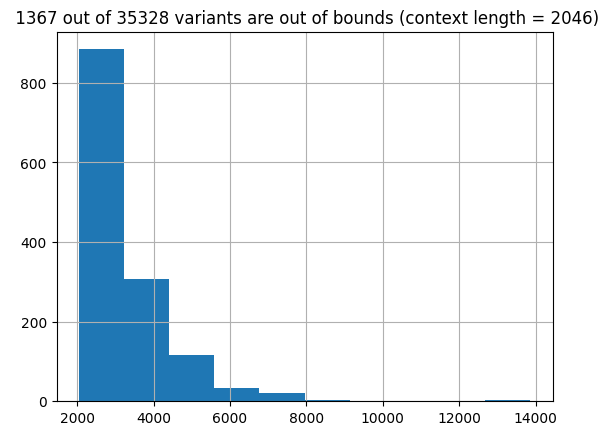

In [20]:
# Check for codons mutations out of bounds of the max context length
context_to_check = 2046
checks = check_mutation_positions(missense_variants.to_pandas(), context_to_check)
checks[checks["out_of_bounds"]].codon_position.hist()
plt.title(
    f" {checks['out_of_bounds'].sum()} out of {len(checks)} variants are out of bounds (context length = {context_to_check})"
)
plt.show()

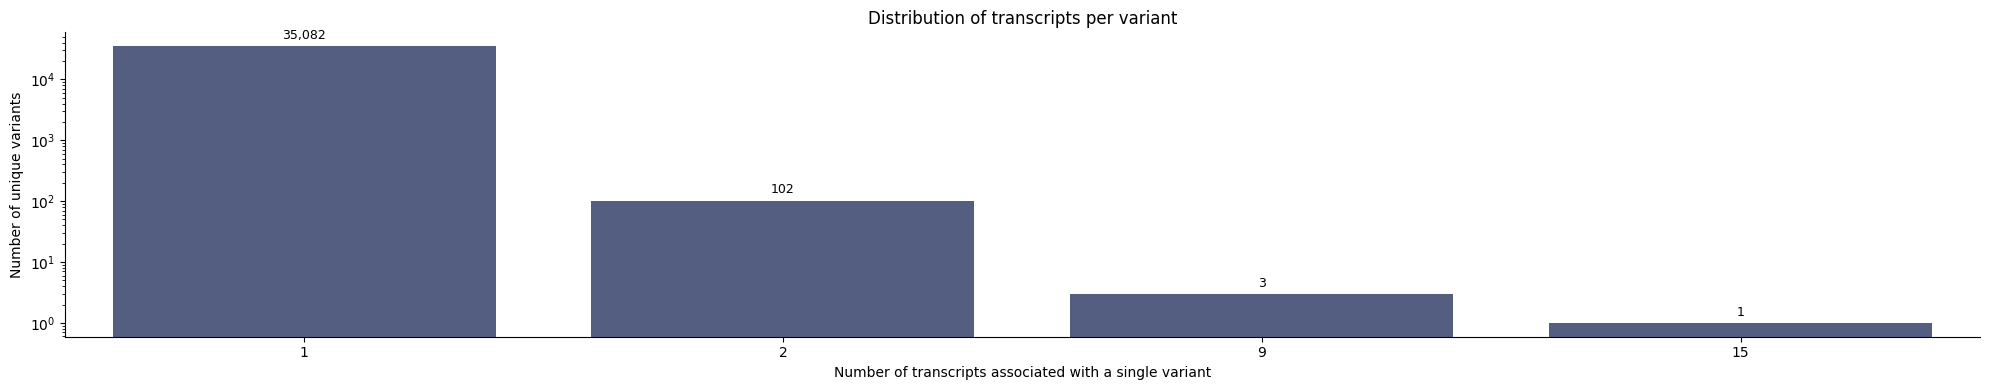

In [21]:
import matplotlib.pyplot as plt


# Count transcripts per variant, then count how many variants fall in each bin
counts_pl = missense_variants.group_by("variant_id").count().rename({"count": "n_transcripts"})
hist_pl = counts_pl.group_by("n_transcripts").count().rename({"count": "n_variants"}).sort("n_transcripts")
df = hist_pl.to_pandas().astype({"n_transcripts": "int64", "n_variants": "int64"})
plt.figure(figsize=(20, 4))
ax = sns.barplot(data=df, x="n_transcripts", y="n_variants", color="#4c5a88")
ax.set_xlabel("Number of transcripts associated with a single variant")
ax.set_ylabel("Number of unique variants")
ax.set_title("Distribution of transcripts per variant")
ax.set_yscale("log")
ax.yaxis.set_major_locator(LogLocator(base=10))  # 10^k ticks                        # log-scale Y
for p in ax.patches:
    h = p.get_height()
    if h > 0:
        ax.annotate(
            f"{int(h):,}",
            (p.get_x() + p.get_width() / 2, h),
            ha="center",
            va="bottom",
            fontsize=9,
            xytext=(0, 3),
            textcoords="offset points",
        )
sns.despine()
plt.tight_layout()
plt.show()

In [22]:
missense_variants.shape

(35328, 31)

In [23]:
missense_variants.write_csv(f"{OUTPUT_DIR}/ddd_asd_zhouetal_processed_am.csv")

# 2. ClinVar AlphaMissense Dataset

In [24]:
dataset_name = "alphamissense_data"
variants = pd.read_csv(f"{DATA_DIR}/{dataset_name}/alphamissense_clinvar.csv")
variants.head(2)

,variant_id,transcript_id,protein_variant,AlphaMissense,label
0,chr1_925969_C_T_hg38,ENST00000342066.8,Q96NU1:P10S,0.967398,0.0
1,chr1_930165_G_A_hg38,ENST00000342066.8,Q96NU1:R28Q,0.662765,0.0


In [26]:
# Get the reference sequence and CDS context annotation of the variants from the GTF annotation and FASTA files
# Using same annotation file that the authors used
from tqdm import tqdm


# Extract assembly from first variant_id (e.g. chr1_925969_C_T_hg38 -> hg38)
assembly = variants["variant_id"].iloc[0].split("_")[-1]
assert assembly == "hg38"
# Extract genomic coordinates from the variant_id
variants[["chrom", "pos", "ref", "alt"]] = variants["variant_id"].str.extract(
    r"(chr\d+|chrX|chrY)_(\d+)_([ACGT])_([ACGT])"
)
variants["pos"] = variants["pos"].astype(int)
variants = variants.sort_values(by=["chrom", "pos"]).reset_index(drop=True).reset_index()
# Remove version numbers after dot in transcript_id
variants["transcript_id"] = variants["transcript_id"].str.split(".").str[0]
gtf_s, fasta = process_gtf(
    f"{DATA_DIR}/reference/ucsc_gencodev32_hg38.tsv", f"{DATA_DIR}/reference/{assembly}/{assembly}.fa"
)
print(f"Processed {gtf_s.shape[0]} GTF CDS sequences")
display(gtf_s[["name", "chrom", "strand", "cdsStart", "cdsEnd", "cds_starts", "cds_ends", "cds_length"]].head(2))

Processing transcripts: 100%|██████████| 110025/110025 [00:16<00:00, 6700.35it/s]


Processed 110025 GTF CDS sequences


,name,chrom,strand,cdsStart,cdsEnd,cds_starts,cds_ends,cds_length
0,ENST00000641515,chr1,+,65564,70008,"(65564, 69036)","(65573, 70008)",981
1,ENST00000335137,chr1,+,69090,70008,"(69090,)","(70008,)",918


In [27]:
# Process variants per chromosome
all_results = []
# Filter sequences with CDS length not multiple of 3
gtf_s = gtf_s[gtf_s["cds_length"].astype(int) % 3 == 0]
chroms = variants["chrom"].unique()
for chrom in tqdm(chroms, desc="Processing chromosomes", total=len(chroms)):
    curr_variants = (
        variants[variants["chrom"] == chrom][["variant_id", "chrom", "pos", "ref", "alt"]].drop_duplicates().copy()
    )
    chrom_gtf = gtf_s[gtf_s["chrom"] == chrom]
    chrom_results = process_a_chrom(curr_variants, chrom_gtf, return_alt_cds=True)
    all_results.append(chrom_results)
all_results = pd.concat(all_results).reset_index(drop=True)
all_results["variant_id"] = all_results["variant_id"] + "_" + assembly
all_results = all_results.merge(
    variants.drop("variant_id", axis=1),
    left_on=["chrom", "pos", "ref", "alt"],
    right_on=["chrom", "pos", "ref", "alt"],
)
print(f"\n Processed {all_results.shape[0]} mutations with CDS context:")
cols_to_display = [
    "chrom",
    "pos",
    "variant_id",
    "ref",
    "alt",
    "tx_name",
    "cdsStart",
    "cdsEnd",
    "tx_strand",
    "var_rel_dist_in_cds",
    "ref_codon",
    "alt_codon",
    "ref_aa",
    "alt_aa",
    "codon_position",
    "index",
    "transcript_id",
    "protein_variant",
    "AlphaMissense",
    "label",
]
display(all_results[cols_to_display].head(2))

Processing chromosomes:   0%|          | 0/24 [00:00<?, ?it/s]

Processing chromosomes: 100%|██████████| 24/24 [00:04<00:00,  5.39it/s]



 Processed 312994 mutations with CDS context:


,chrom,pos,variant_id,ref,alt,tx_name,cdsStart,cdsEnd,tx_strand,var_rel_dist_in_cds,ref_codon,alt_codon,ref_aa,alt_aa,codon_position,index,transcript_id,protein_variant,AlphaMissense,label
0,chr1,925969,chr1_925969_C_T_hg38,C,T,ENST00000420190,924431,939291,+,564,CCT,TCT,P,S,188,0,ENST00000342066,Q96NU1:P10S,0.967398,0.0
1,chr1,930165,chr1_930165_G_A_hg38,G,A,ENST00000420190,924431,939291,+,619,CGG,CAG,R,Q,206,1,ENST00000342066,Q96NU1:R28Q,0.662765,0.0


In [28]:
# Ensure reference allele in fasta matches reference allele in variants
for i in range(variants.shape[0]):
    t = variants.iloc[i]
    variant_id = t["variant_id"]
    chrom = t["chrom"]
    pos = t["pos"]
    ref = t["ref"]
    hg_ref = fasta[chrom][pos - 1]
    if hg_ref != ref:
        print(f"Mismatch at {chrom}:{pos}, {ref} != {hg_ref}, {variant_id}")

In [29]:
# Merge variants with processed results based on transcript_id
merged = variants.merge(
    all_results,
    left_on=["transcript_id", "variant_id", "chrom", "pos", "ref", "alt"],
    right_on=["tx_name", "variant_id", "chrom", "pos", "ref", "alt"],
    suffixes=("", "_y"),
)
merged.rename(columns={"index": "id"}, inplace=True)
merged[["label"]].value_counts()

label
0.0      51987
1.0      30862
Name: count, dtype: int64

In [30]:
merged.head(2)

,level_0,id,variant_id,transcript_id,protein_variant,AlphaMissense,label,chrom,pos,ref,...,ref_aa,alt_aa,alt_seq,codon_position,level_0_y,index_y,transcript_id_y,protein_variant_y,AlphaMissense_y,label_y
0,0,0,chr1_925969_C_T_hg38,ENST00000342066,Q96NU1:P10S,0.967398,0.0,chr1,925969,C,...,P,S,ATGTCCAAGGGGATCCTGCAGGTGCATTCTCCGATCTGCGACTGCC...,9,0,0,ENST00000342066,Q96NU1:P10S,0.967398,0.0
1,1,1,chr1_930165_G_A_hg38,ENST00000342066,Q96NU1:R28Q,0.662765,0.0,chr1,930165,G,...,R,Q,ATGTCCAAGGGGATCCTGCAGGTGCATCCTCCGATCTGCGACTGCC...,27,1,1,ENST00000342066,Q96NU1:R28Q,0.662765,0.0


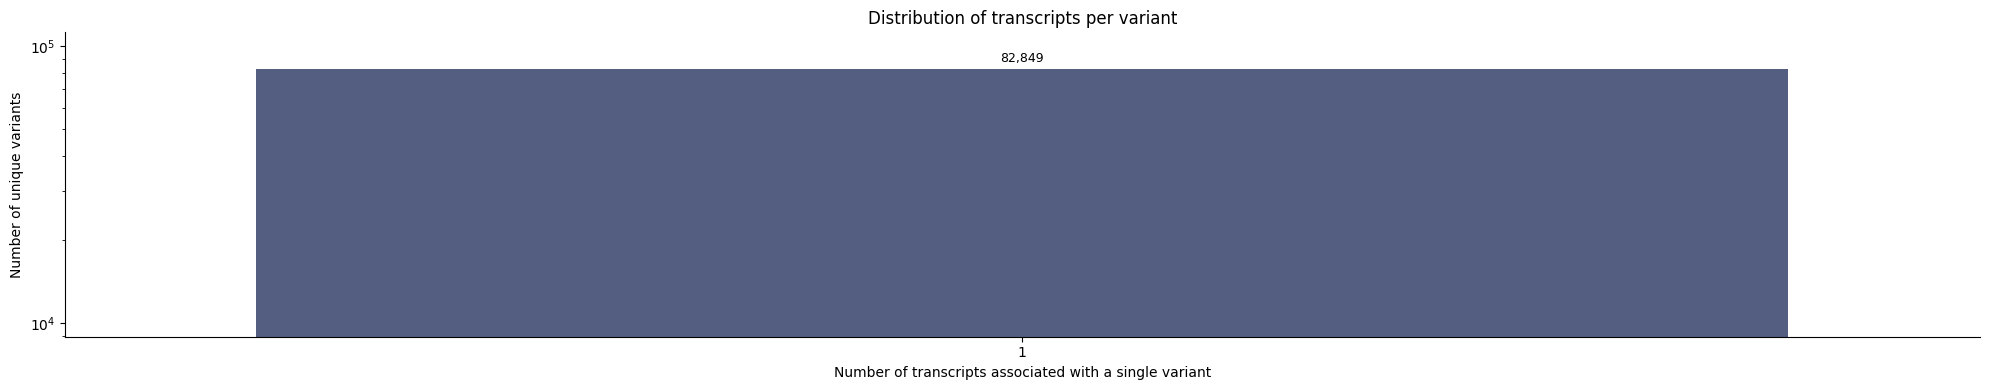

In [31]:
plot_transcript_distribution(merged)

In [32]:
merged.to_csv(f"{OUTPUT_DIR}/alphamissense_clinvar_processed.csv", index=False)

# 3. Cancer Hotspot

In [33]:
dataset_name = "alphamissense_data"
variants = pd.read_csv(f"{DATA_DIR}/{dataset_name}/alphamissense_cancer_hotspot.csv")
variants.head(2)

,variant_id,transcript_id,protein_variant,AlphaMissense,label
0,chr15_40382900_G_A_hg38,ENST00000249776.12,Q9Y448:C22Y,0.086676,1
1,chr12_913902_C_T_hg38,ENST00000430095.6,P43351:R396H,0.056817,1


In [38]:
# Get the reference sequence and CDS context annotation of the variants from the GTF annotation and FASTA files #
# Using same annotation file that the authors used

## Extract assembly from first variant_id (e.g. chr1_925969_C_T_hg38 -> hg38)
assembly = variants["variant_id"].iloc[0].split("_")[-1]
assert assembly == "hg38"
## Extract genomic coordinates from the variant_id
variants[["chrom", "pos", "ref", "alt"]] = variants["variant_id"].str.extract(
    r"(chr\d+|chrX|chrY)_(\d+)_([ACGT])_([ACGT])"
)
variants["pos"] = variants["pos"].astype(int)
variants = variants.sort_values(by=["chrom", "pos"]).reset_index(drop=True).reset_index()
## Remove version numbers after dot in transcript_id
variants["transcript_id"] = variants["transcript_id"].str.split(".").str[0]
## Get the CDS sequences and annotations from the GTF and FASTA files
gtf_s, fasta = process_gtf(
    f"{DATA_DIR}/reference/ucsc_gencodev32_hg38.tsv", f"{DATA_DIR}/reference/{assembly}/{assembly}.fa"
)
print(f"Processed {gtf_s.shape[0]} GTF CDS sequences")
display(gtf_s[["name", "chrom", "strand", "cdsStart", "cdsEnd", "cds_starts", "cds_ends", "cds_length"]].head(2))

Processing transcripts: 100%|██████████| 110025/110025 [00:16<00:00, 6591.19it/s]


Processed 110025 GTF CDS sequences


,name,chrom,strand,cdsStart,cdsEnd,cds_starts,cds_ends,cds_length
0,ENST00000641515,chr1,+,65564,70008,"(65564, 69036)","(65573, 70008)",981
1,ENST00000335137,chr1,+,69090,70008,"(69090,)","(70008,)",918


In [39]:
# Process variants per chromosome
all_results = []
# Filter sequences with CDS length not multiple of 3
gtf_s = gtf_s[gtf_s["cds_length"].astype(int) % 3 == 0]
chroms = variants["chrom"].unique()
for chrom in tqdm(chroms, desc="Processing chromosomes", total=len(chroms)):
    curr_variants = (
        variants[variants["chrom"] == chrom][["variant_id", "chrom", "pos", "ref", "alt"]].drop_duplicates().copy()
    )
    chrom_gtf = gtf_s[gtf_s["chrom"] == chrom]
    chrom_results = process_a_chrom(curr_variants, chrom_gtf, return_alt_cds=True)
    all_results.append(chrom_results)
all_results = pd.concat(all_results).reset_index(drop=True)
all_results["variant_id"] = all_results["variant_id"] + "_" + assembly
all_results = all_results.merge(
    variants.drop("variant_id", axis=1),
    left_on=["chrom", "pos", "ref", "alt"],
    right_on=["chrom", "pos", "ref", "alt"],
)
print(f"\n Processed {all_results.shape[0]} mutations with CDS context:")
cols_to_display = [
    "chrom",
    "pos",
    "variant_id",
    "ref",
    "alt",
    "tx_name",
    "cdsStart",
    "cdsEnd",
    "tx_strand",
    "var_rel_dist_in_cds",
    "ref_codon",
    "alt_codon",
    "ref_aa",
    "alt_aa",
    "codon_position",
    "index",
    "transcript_id",
    "protein_variant",
    "AlphaMissense",
    "label",
]
display(all_results[cols_to_display].head(2))

Processing chromosomes:   0%|          | 0/23 [00:00<?, ?it/s]

Processing chromosomes: 100%|██████████| 23/23 [00:00<00:00, 81.38it/s]


 Processed 11615 mutations with CDS context:


,chrom,pos,variant_id,ref,alt,tx_name,cdsStart,cdsEnd,tx_strand,var_rel_dist_in_cds,ref_codon,alt_codon,ref_aa,alt_aa,codon_position,index,transcript_id,protein_variant,AlphaMissense,label
0,chr1,2557810,chr1_2557810_G_A_hg38,G,A,ENST00000409119,2556664,2561524,+,153,GAG,AAG,E,K,51,0,ENST00000355716,Q92956:E52K,0.232843,0
1,chr1,2558346,chr1_2558346_A_G_hg38,A,G,ENST00000409119,2556664,2561524,+,181,TAT,TGT,Y,C,60,1,ENST00000355716,Q92956:Y61C,0.839032,0


In [40]:
# Ensure reference allele in fasta matches reference allele in variants
for i in range(variants.shape[0]):
    t = variants.iloc[i]
    variant_id = t["variant_id"]
    chrom = t["chrom"]
    pos = t["pos"]
    ref = t["ref"]
    hg_ref = fasta[chrom][pos - 1]
    if hg_ref != ref:
        print(f"Mismatch at {chrom}:{pos}, {ref} != {hg_ref}, {variant_id}")

In [41]:
merged = variants.merge(
    all_results,
    left_on=["transcript_id", "variant_id", "chrom", "pos", "ref", "alt"],
    right_on=["tx_name", "variant_id", "chrom", "pos", "ref", "alt"],
    suffixes=("", "_y"),
)
merged.rename(columns={"index": "id"}, inplace=True)
merged.head(2)

,level_0,id,variant_id,transcript_id,protein_variant,AlphaMissense,label,chrom,pos,ref,...,ref_aa,alt_aa,alt_seq,codon_position,level_0_y,index_y,transcript_id_y,protein_variant_y,AlphaMissense_y,label_y
0,0,0,chr1_2557810_G_A_hg38,ENST00000355716,Q92956:E52K,0.232843,0,chr1,2557810,G,...,E,K,ATGGAGCCTCCTGGAGACTGGGGGCCTCCTCCCTGGAGATCCACCC...,51,0,0,ENST00000355716,Q92956:E52K,0.232843,0
1,1,1,chr1_2558346_A_G_hg38,ENST00000355716,Q92956:Y61C,0.839032,0,chr1,2558346,A,...,Y,C,ATGGAGCCTCCTGGAGACTGGGGGCCTCCTCCCTGGAGATCCACCC...,60,1,1,ENST00000355716,Q92956:Y61C,0.839032,0


In [42]:
merged["label"].value_counts()

label
0    1733
1     868
Name: count, dtype: int64

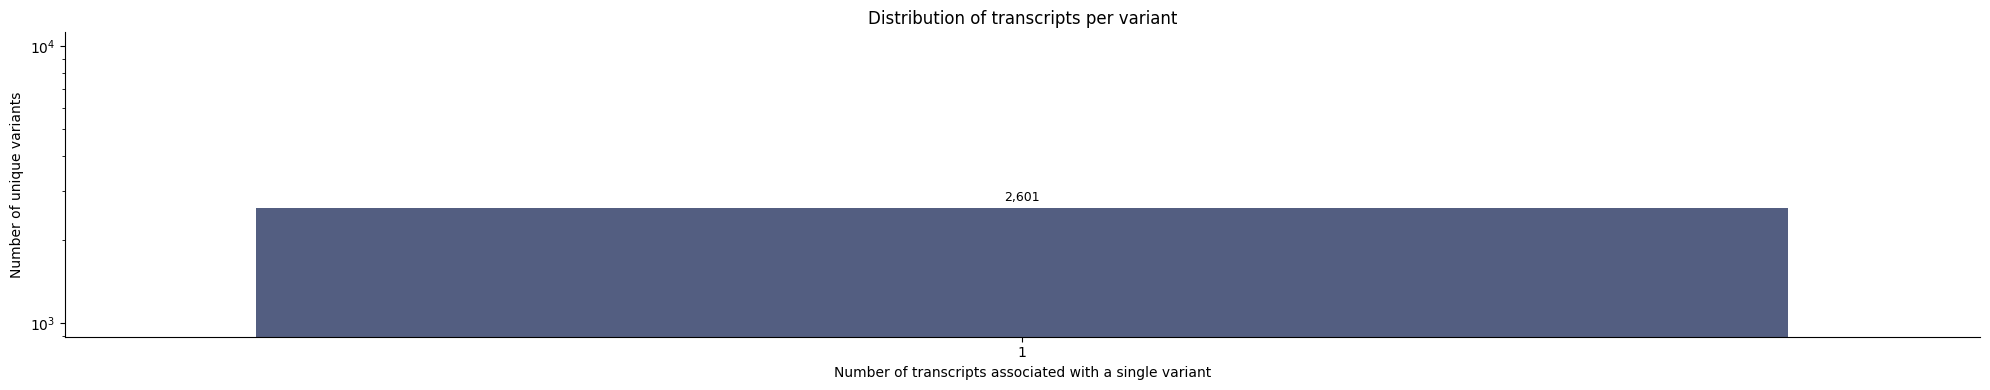

In [43]:
plot_transcript_distribution(merged)

In [44]:
merged.to_csv(f"{OUTPUT_DIR}/alphamissense_cancer_hotspot_processed.csv", index=False)

# 4. ClinVar Synonymous

In [48]:
dataset_name = "clinvar_synom"

# Get the synonymous variants from Clinvar
data = pd.read_table(f"{DATA_DIR}/clinvar_syn/variant_summary.txt.gz", low_memory=False)
data.iloc[:, 18] = data.iloc[:, 18].astype(str)
data = pl.from_pandas(data)
data = data.rename({"#AlleleID": "AlleleID"})
data = data.filter(
    (pl.col("Type") == "single nucleotide variant")
    & (pl.col("Assembly") == "GRCh38")
    & (
        pl.col("ReviewStatus").is_in(
            [
                "practice guideline",
                "reviewed by expert panel",
                "criteria provided, multiple submitters, no conflicts",
            ]
        )
    )
)
# normalize ref and alt
data = data.with_columns(
    ("chr" + pl.col("Chromosome")).alias("chrom"),
    pl.col("PositionVCF").alias("pos"),
    pl.col("ReferenceAlleleVCF").alias("ref"),
    pl.col("AlternateAlleleVCF").alias("alt"),
)

# filter synonymous variants
valid_chroms = ["chr" + str(i) for i in range(1, 23)]
clinvar_syn = data.filter(pl.col("Name").str.ends_with("=)")).filter(pl.col("ref") != pl.col("alt"))
clinvar_syn = clinvar_syn.filter(pl.col("chrom").is_in(valid_chroms))

# Label variants as benign or pathogenic
benign_labels = [
    "Benign",
    "Likely benign",
    "Benign/Likely benign",
]
patho_labels = ["Likely pathogenic", "Pathogenic", "Pathogenic/Likely pathogenic"]
clinvar_syn = clinvar_syn.filter(pl.col("ClinicalSignificance").is_in(benign_labels + patho_labels))


clinvar_syn.head(2)

AlleleID,Type,Name,GeneID,GeneSymbol,HGNC_ID,ClinicalSignificance,ClinSigSimple,LastEvaluated,RS# (dbSNP),nsv/esv (dbVar),RCVaccession,PhenotypeIDS,PhenotypeList,Origin,OriginSimple,Assembly,ChromosomeAccession,Chromosome,Start,Stop,ReferenceAllele,AlternateAllele,Cytogenetic,ReviewStatus,NumberSubmitters,Guidelines,TestedInGTR,OtherIDs,SubmitterCategories,VariationID,PositionVCF,ReferenceAlleleVCF,AlternateAlleleVCF,SomaticClinicalImpact,SomaticClinicalImpactLastEvaluated,ReviewStatusClinicalImpact,Oncogenicity,OncogenicityLastEvaluated,ReviewStatusOncogenicity,SCVsForAggregateGermlineClassification,SCVsForAggregateSomaticClinicalImpact,SCVsForAggregateOncogenicityClassification,chrom,pos,ref,alt
i64,str,str,i64,str,str,str,i64,str,i64,str,str,str,str,str,str,str,str,str,i64,i64,str,str,str,str,i64,str,str,str,i64,i64,i64,str,str,str,str,str,str,str,str,str,str,str,str,i64,str,str
15111,"""single nucleotide variant""","""NM_000374.5(UROD):c.942G>A (p.…",7389,"""UROD""","""HGNC:12591""","""Likely pathogenic""",1,"""Apr 06, 2024""",121918062,"""-""","""RCV000000090|RCV001851503|RCV0…","""MONDO:MONDO:0008296,MedGen:C02…","""Familial porphyria cutanea tar…","""germline""","""germline""","""GRCh38""","""NC_000001.11""","""1""",45015006,45015006,"""na""","""na""","""1p34.1""","""criteria provided, multiple su…",3,"""-""","""N""","""ClinGen:CA251376,OMIM:613521.0…",3,72,45015006,"""G""","""A""","""-""","""-""","""-""","""-""","""-""","""-""","""SCV002265299|SCV004109541""","""-""","""-""","""chr1""",45015006,"""G""","""A"""
15200,"""single nucleotide variant""","""NM_000274.4(OAT):c.1134C>T (p.…",4942,"""OAT""","""HGNC:8091""","""Benign""",0,"""Feb 03, 2025""",11461,"""-""","""RCV000380778|RCV000831333|RCV0…","""MONDO:MONDO:0009796,MedGen:C00…","""Ornithine aminotransferase def…","""germline;unknown""","""germline""","""GRCh38""","""NC_000010.11""","""10""",124400865,124400865,"""na""","""na""","""10q26.13""","""criteria provided, multiple su…",10,"""-""","""N""","""ClinGen:CA113955,OMIM:613349.0…",3,161,124400865,"""G""","""A""","""-""","""-""","""-""","""-""","""-""","""-""","""SCV000361341|SCV000973075|SCV0…","""-""","""-""","""chr10""",124400865,"""G""","""A"""


In [49]:
# Get the reference sequence and CDS context annotation of the variants from the GTF and FASTA files

# Build CDS sequences for synonymous variants
valid_chroms = ["chr" + str(i) for i in range(1, 23)]
refseq = pl.read_csv(f"{DATA_DIR}/reference/ucsc_refseq_hg38.tsv", separator="\t")
refseq_hist = pl.read_csv(f"{DATA_DIR}/reference/ucsc_refseq_hist_hg38.tsv", separator="\t")
refseq = pl.concat([refseq, refseq_hist])
refseq = refseq.filter(pl.col("chrom").is_in(valid_chroms)).unique()
fasta = {}

with pyfaidx.Fasta(f"{DATA_DIR}/reference/hg38/hg38.fa") as f:
    for chrom in refseq["chrom"].unique():
        fasta[chrom] = f[chrom][:].seq
refseq = refseq.with_columns(
    pl.struct(pl.all())
    .map_elements(lambda row: extract_cds_sequence(row, fasta), return_dtype=pl.String)
    .alias("cds_sequence")
).filter(pl.col("cds_sequence").str.len_chars() % 3 == 0)
refseq.head(2)

#bin,name,chrom,strand,txStart,txEnd,cdsStart,cdsEnd,exonCount,exonStarts,exonEnds,score,name2,cdsStartStat,cdsEndStat,exonFrames,cds_sequence
i64,str,str,str,i64,i64,i64,i64,i64,str,str,i64,str,str,str,str,str
1098,"""NR_136665.1""","""chr16""","""+""",67248871,67272204,67272204,67272204,15,"""67248871,67252541,67255034,672…","""67249201,67252805,67255184,672…",0,"""SLC9A5""","""none""","""none""","""-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,…",""""""
1172,"""NR_169510.1""","""chr14""","""-""",77031558,77034206,77034206,77034206,2,"""77031558,77033839,""","""77033215,77034206,""",0,"""LOC105370579""","""none""","""none""","""-1,-1,""",""""""


In [50]:
# Add splicing junction information
splicing_juncs = []
for row in refseq.iter_rows(named=True):
    exon_starts = row["exonStarts"].strip(",").split(",")
    exon_ends = row["exonEnds"].strip(",").split(",")
    exon_starts = [int(i) for i in exon_starts]
    exon_ends = [int(i) for i in exon_ends]
    for i in range(1, len(exon_starts)):
        splicing_juncs.append([row["name"], row["chrom"], row["strand"], exon_starts[i] - 2, exon_starts[i] + 2])
    for i in range(0, len(exon_ends) - 1):
        splicing_juncs.append([row["name"], row["chrom"], row["strand"], exon_ends[i] - 2, exon_ends[i] + 2])
splicing_juncs = pd.DataFrame(splicing_juncs, columns=["tx", "chrom", "strand", "start", "end"])
splicing_juncs = pl.from_pandas(splicing_juncs)

# Extract all unique transcripts first
unique_tx = clinvar_syn["Name"].str.split(":").list.get(0).str.split("(").list.get(0).unique()
# Create a dictionary mapping transcripts to their junction ranges
tx_junc_dict = {}
for tx in unique_tx:
    tx_juncs = splicing_juncs.filter(pl.col("tx") == tx)
    if len(tx_juncs) > 0:
        tx_junc_dict[tx] = {"starts": tx_juncs["start"].to_numpy(), "ends": tx_juncs["end"].to_numpy()}


def check_splice_junction_fast(variant):
    tx = variant["Name"].split(":")[0].split("(")[0]
    # if tx not in tx_junc_dict:
    #     return False
    juncs = tx_junc_dict[tx]
    return np.any((variant["pos"] - 1 >= juncs["starts"]) & (variant["pos"] - 1 < juncs["ends"]))


tx_gposes = {}
for row in refseq.rows(named=True):
    curr_poses = []
    chrom = row["chrom"]
    strand = row["strand"]
    cds_start = row["cdsStart"]
    cds_end = row["cdsEnd"]

    # Parse exon coordinates
    exon_starts = [int(x) for x in row["exonStarts"].rstrip(",").split(",")]
    exon_ends = [int(x) for x in row["exonEnds"].rstrip(",").split(",")]
    for start, end in zip(exon_starts, exon_ends):
        # Find overlap between exon and CDS
        overlap_start = max(start, cds_start)
        overlap_end = min(end, cds_end)
        for i in range(overlap_start, overlap_end):
            curr_poses.append(i)
    if strand == "-":
        curr_poses = curr_poses[::-1]
    tx_gposes[(row["chrom"], row["name"])] = curr_poses

dset = clinvar_syn.with_columns(pl.col("Name").str.split(":").list.get(0).str.split("(").list.get(0).alias("tx"))
dset = dset.filter(pl.col("tx").is_in(tx_junc_dict.keys()))
dset = dset.with_columns(
    pl.struct(pl.all()).map_elements(check_splice_junction_fast, return_dtype=pl.Boolean).alias("in_splice_junction")
)

dset.head(2)

AlleleID,Type,Name,GeneID,GeneSymbol,HGNC_ID,ClinicalSignificance,ClinSigSimple,LastEvaluated,RS# (dbSNP),nsv/esv (dbVar),RCVaccession,PhenotypeIDS,PhenotypeList,Origin,OriginSimple,Assembly,ChromosomeAccession,Chromosome,Start,Stop,ReferenceAllele,AlternateAllele,Cytogenetic,ReviewStatus,NumberSubmitters,Guidelines,TestedInGTR,OtherIDs,SubmitterCategories,VariationID,PositionVCF,ReferenceAlleleVCF,AlternateAlleleVCF,SomaticClinicalImpact,SomaticClinicalImpactLastEvaluated,ReviewStatusClinicalImpact,Oncogenicity,OncogenicityLastEvaluated,ReviewStatusOncogenicity,SCVsForAggregateGermlineClassification,SCVsForAggregateSomaticClinicalImpact,SCVsForAggregateOncogenicityClassification,chrom,pos,ref,alt,tx,in_splice_junction
i64,str,str,i64,str,str,str,i64,str,i64,str,str,str,str,str,str,str,str,str,i64,i64,str,str,str,str,i64,str,str,str,i64,i64,i64,str,str,str,str,str,str,str,str,str,str,str,str,i64,str,str,str,bool
15111,"""single nucleotide variant""","""NM_000374.5(UROD):c.942G>A (p.…",7389,"""UROD""","""HGNC:12591""","""Likely pathogenic""",1,"""Apr 06, 2024""",121918062,"""-""","""RCV000000090|RCV001851503|RCV0…","""MONDO:MONDO:0008296,MedGen:C02…","""Familial porphyria cutanea tar…","""germline""","""germline""","""GRCh38""","""NC_000001.11""","""1""",45015006,45015006,"""na""","""na""","""1p34.1""","""criteria provided, multiple su…",3,"""-""","""N""","""ClinGen:CA251376,OMIM:613521.0…",3,72,45015006,"""G""","""A""","""-""","""-""","""-""","""-""","""-""","""-""","""SCV002265299|SCV004109541""","""-""","""-""","""chr1""",45015006,"""G""","""A""","""NM_000374.5""",true
15200,"""single nucleotide variant""","""NM_000274.4(OAT):c.1134C>T (p.…",4942,"""OAT""","""HGNC:8091""","""Benign""",0,"""Feb 03, 2025""",11461,"""-""","""RCV000380778|RCV000831333|RCV0…","""MONDO:MONDO:0009796,MedGen:C00…","""Ornithine aminotransferase def…","""germline;unknown""","""germline""","""GRCh38""","""NC_000010.11""","""10""",124400865,124400865,"""na""","""na""","""10q26.13""","""criteria provided, multiple su…",10,"""-""","""N""","""ClinGen:CA113955,OMIM:613349.0…",3,161,124400865,"""G""","""A""","""-""","""-""","""-""","""-""","""-""","""-""","""SCV000361341|SCV000973075|SCV0…","""-""","""-""","""chr10""",124400865,"""G""","""A""","""NM_000274.4""",false


In [51]:
# Process variants per chromosome and add additional features: pLI, PhyloP, codon frequencies
import re


result = []

for row in tqdm(dset.rows(named=True)):
    s = row["Name"].split(":")[1].split(" ")[0]
    m = re.fullmatch(r"c\.(\d+)([ACGT])>([ACGT])", s)
    pos_cds, ref_cds, alt_cds = int(m.group(1)), m.group(2), m.group(3)

    tx = refseq.filter((pl.col("name") == row["tx"]) & (pl.col("chrom") == row["chrom"]))[0]
    try:
        pos_cds0 = tx_gposes[(row["chrom"], row["tx"])].index(row["pos"] - 1)
    except:
        continue
    seq = tx[0, "cds_sequence"]
    if pos_cds0 + 1 != pos_cds:
        print(str(row))
    assert seq[pos_cds0] == ref_cds
    assert ref_cds == row["ref"] if tx[0, "strand"] == "+" else reverse_complement_dna(row["ref"])
    assert alt_cds == row["alt"] if tx[0, "strand"] == "+" else reverse_complement_dna(row["alt"])

    codon_position = pos_cds0 // 3
    ref_codon = seq[codon_position * 3 : (codon_position + 1) * 3]
    remainder = pos_cds0 % 3
    alt_nuc = list(ref_codon)
    alt_nuc[remainder] = alt_cds
    alt_codon = "".join(alt_nuc)
    item = {
        "chrom": row["chrom"],
        "pos": row["pos"],
        "ref": row["ref"],
        "alt": row["alt"],
        "var_rel_dist_in_cds": pos_cds0,
        "codon_position": codon_position,
        "ref_codon": ref_codon,
        "alt_codon": alt_codon,
        "tx": row["tx"],
        "label": row["ClinicalSignificance"],
        "in_splice_junction": row["in_splice_junction"],
        "ref_seq": seq,
        "alt_seq": seq[:pos_cds0] + alt_cds + seq[pos_cds0 + 1 :],
    }
    result.append(item)


result_df = pl.from_dicts(result).with_row_index("id")
frame = result_df.to_pandas()
(frame["ref_seq"].apply(lambda x: len(x) == 0)).sum()

  5%|▌         | 6731/129454 [00:06<01:58, 1032.67it/s]

{'AlleleID': 178069, 'Type': 'single nucleotide variant', 'Name': 'NM_001372044.2(SHANK3):c.3588C>T (p.Ser1196=)', 'GeneID': 85358, 'GeneSymbol': 'SHANK3', 'HGNC_ID': 'HGNC:14294', 'ClinicalSignificance': 'Benign/Likely benign', 'ClinSigSimple': 0, 'LastEvaluated': 'May 01, 2025', 'RS# (dbSNP)': 200077311, 'nsv/esv (dbVar)': '-', 'RCVaccession': 'RCV002313002|RCV001668310|RCV000735080', 'PhenotypeIDS': 'MeSH:D030342,MedGen:C0950123|MedGen:C3661900|MedGen:CN169374', 'PhenotypeList': 'Inborn genetic diseases|not provided|not specified', 'Origin': 'germline', 'OriginSimple': 'germline', 'Assembly': 'GRCh38', 'ChromosomeAccession': 'NC_000022.11', 'Chromosome': '22', 'Start': 50721196, 'Stop': 50721196, 'ReferenceAllele': 'na', 'AlternateAllele': 'na', 'Cytogenetic': '22q13.33', 'ReviewStatus': 'criteria provided, multiple submitters, no conflicts', 'NumberSubmitters': 5, 'Guidelines': '-', 'TestedInGTR': 'N', 'OtherIDs': 'ClinGen:CA180434', 'SubmitterCategories': 2, 'VariationID': 167684,

  9%|▉         | 11706/129454 [00:11<01:54, 1025.35it/s]

{'AlleleID': 237006, 'Type': 'single nucleotide variant', 'Name': 'NM_001372044.2(SHANK3):c.2028G>A (p.Thr676=)', 'GeneID': 85358, 'GeneSymbol': 'SHANK3', 'HGNC_ID': 'HGNC:14294', 'ClinicalSignificance': 'Benign/Likely benign', 'ClinSigSimple': 0, 'LastEvaluated': 'Jan 01, 2025', 'RS# (dbSNP)': 73892912, 'nsv/esv (dbVar)': '-', 'RCVaccession': 'RCV000224793|RCV001726056|RCV002315674', 'PhenotypeIDS': 'MedGen:C3661900|MedGen:CN169374|MeSH:D030342,MedGen:C0950123', 'PhenotypeList': 'not provided|not specified|Inborn genetic diseases', 'Origin': 'germline', 'OriginSimple': 'germline', 'Assembly': 'GRCh38', 'ChromosomeAccession': 'NC_000022.11', 'Chromosome': '22', 'Start': 50704769, 'Stop': 50704769, 'ReferenceAllele': 'na', 'AlternateAllele': 'na', 'Cytogenetic': '22q13.33', 'ReviewStatus': 'criteria provided, multiple submitters, no conflicts', 'NumberSubmitters': 6, 'Guidelines': '-', 'TestedInGTR': 'N', 'OtherIDs': 'ClinGen:CA10325660', 'SubmitterCategories': 2, 'VariationID': 235319,

 16%|█▌        | 20263/129454 [00:19<01:44, 1047.00it/s]

{'AlleleID': 346769, 'Type': 'single nucleotide variant', 'Name': 'NM_001379500.1(COL18A1):c.2832A>C (p.Pro944=)', 'GeneID': 80781, 'GeneSymbol': 'COL18A1', 'HGNC_ID': 'HGNC:2195', 'ClinicalSignificance': 'Likely benign', 'ClinSigSimple': 0, 'LastEvaluated': 'Feb 03, 2025', 'RS# (dbSNP)': 751825604, 'nsv/esv (dbVar)': '-', 'RCVaccession': 'RCV000349746|RCV002057775|RCV004549794', 'PhenotypeIDS': 'MONDO:MONDO:0800166,MedGen:C1849409,OMIM:PS267750,Orphanet:1571|MedGen:C3661900|', 'PhenotypeList': 'Knobloch syndrome|not provided|COL18A1-related disorder', 'Origin': 'germline', 'OriginSimple': 'germline', 'Assembly': 'GRCh38', 'ChromosomeAccession': 'NC_000021.9', 'Chromosome': '21', 'Start': 45504529, 'Stop': 45504529, 'ReferenceAllele': 'na', 'AlternateAllele': 'na', 'Cytogenetic': '21q22.3', 'ReviewStatus': 'criteria provided, multiple submitters, no conflicts', 'NumberSubmitters': 5, 'Guidelines': '-', 'TestedInGTR': 'N', 'OtherIDs': 'ClinGen:CA10650647', 'SubmitterCategories': 2, 'Var

 23%|██▎       | 29339/129454 [00:27<01:36, 1038.97it/s]

{'AlleleID': 431503, 'Type': 'single nucleotide variant', 'Name': 'NM_001372044.2(SHANK3):c.4038C>T (p.Gly1346=)', 'GeneID': 85358, 'GeneSymbol': 'SHANK3', 'HGNC_ID': 'HGNC:14294', 'ClinicalSignificance': 'Benign/Likely benign', 'ClinSigSimple': 0, 'LastEvaluated': 'Apr 01, 2024', 'RS# (dbSNP)': 367676023, 'nsv/esv (dbVar)': '-', 'RCVaccession': 'RCV000590960|RCV001662502|RCV002358390', 'PhenotypeIDS': 'Human Phenotype Ontology:HP:0000717,MONDO:MONDO:0005260,MeSH:D001321,MedGen:C0004352,OMIM:209850|MedGen:C3661900|MeSH:D030342,MedGen:C0950123', 'PhenotypeList': 'Autism|not provided|Inborn genetic diseases', 'Origin': 'germline;unknown', 'OriginSimple': 'germline', 'Assembly': 'GRCh38', 'ChromosomeAccession': 'NC_000022.11', 'Chromosome': '22', 'Start': 50721646, 'Stop': 50721646, 'ReferenceAllele': 'na', 'AlternateAllele': 'na', 'Cytogenetic': '22q13.33', 'ReviewStatus': 'criteria provided, multiple submitters, no conflicts', 'NumberSubmitters': 4, 'Guidelines': '-', 'TestedInGTR': 'N'

 28%|██▊       | 36418/129454 [00:34<01:19, 1168.23it/s]

{'AlleleID': 486315, 'Type': 'single nucleotide variant', 'Name': 'NM_001372044.2(SHANK3):c.5043C>G (p.Pro1681=)', 'GeneID': 85358, 'GeneSymbol': 'SHANK3', 'HGNC_ID': 'HGNC:14294', 'ClinicalSignificance': 'Likely benign', 'ClinSigSimple': 0, 'LastEvaluated': 'Jul 01, 2024', 'RS# (dbSNP)': 958460783, 'nsv/esv (dbVar)': '-', 'RCVaccession': 'RCV000585318', 'PhenotypeIDS': 'MedGen:C3661900', 'PhenotypeList': 'not provided', 'Origin': 'germline', 'OriginSimple': 'germline', 'Assembly': 'GRCh38', 'ChromosomeAccession': 'NC_000022.11', 'Chromosome': '22', 'Start': 50730934, 'Stop': 50730934, 'ReferenceAllele': 'na', 'AlternateAllele': 'na', 'Cytogenetic': '22q13.33', 'ReviewStatus': 'criteria provided, multiple submitters, no conflicts', 'NumberSubmitters': 2, 'Guidelines': '-', 'TestedInGTR': 'N', 'OtherIDs': 'ClinGen:CA325591023', 'SubmitterCategories': 2, 'VariationID': 493352, 'PositionVCF': 50730934, 'ReferenceAlleleVCF': 'C', 'AlternateAlleleVCF': 'G', 'SomaticClinicalImpact': '-', 'So

 35%|███▍      | 45075/129454 [00:42<01:27, 967.44it/s] 

{'AlleleID': 580539, 'Type': 'single nucleotide variant', 'Name': 'NM_001372044.2(SHANK3):c.2118C>T (p.Ile706=)', 'GeneID': 85358, 'GeneSymbol': 'SHANK3', 'HGNC_ID': 'HGNC:14294', 'ClinicalSignificance': 'Benign/Likely benign', 'ClinSigSimple': 0, 'LastEvaluated': 'Sep 01, 2024', 'RS# (dbSNP)': 182897668, 'nsv/esv (dbVar)': '-', 'RCVaccession': 'RCV001683645|RCV002313699', 'PhenotypeIDS': 'MedGen:C3661900|MeSH:D030342,MedGen:C0950123', 'PhenotypeList': 'not provided|Inborn genetic diseases', 'Origin': 'germline', 'OriginSimple': 'germline', 'Assembly': 'GRCh38', 'ChromosomeAccession': 'NC_000022.11', 'Chromosome': '22', 'Start': 50704859, 'Stop': 50704859, 'ReferenceAllele': 'na', 'AlternateAllele': 'na', 'Cytogenetic': '22q13.33', 'ReviewStatus': 'criteria provided, multiple submitters, no conflicts', 'NumberSubmitters': 3, 'Guidelines': '-', 'TestedInGTR': 'N', 'OtherIDs': 'ClinGen:CA10325682', 'SubmitterCategories': 2, 'VariationID': 588762, 'PositionVCF': 50704859, 'ReferenceAllele

 49%|████▊     | 63068/129454 [00:59<01:01, 1071.16it/s]

{'AlleleID': 728536, 'Type': 'single nucleotide variant', 'Name': 'NM_001401501.2(MUC16):c.44076G>A (p.Glu14692=)', 'GeneID': 94025, 'GeneSymbol': 'MUC16', 'HGNC_ID': 'HGNC:15582', 'ClinicalSignificance': 'Benign/Likely benign', 'ClinSigSimple': 0, 'LastEvaluated': 'Jan 01, 2023', 'RS# (dbSNP)': 187392925, 'nsv/esv (dbVar)': '-', 'RCVaccession': 'RCV000891417|RCV003940689', 'PhenotypeIDS': 'MedGen:C3661900|', 'PhenotypeList': 'not provided|MUC16-related disorder', 'Origin': 'germline', 'OriginSimple': 'germline', 'Assembly': 'GRCh38', 'ChromosomeAccession': 'NC_000019.10', 'Chromosome': '19', 'Start': 8882863, 'Stop': 8882863, 'ReferenceAllele': 'na', 'AlternateAllele': 'na', 'Cytogenetic': '19p13.2', 'ReviewStatus': 'criteria provided, multiple submitters, no conflicts', 'NumberSubmitters': 4, 'Guidelines': '-', 'TestedInGTR': 'N', 'OtherIDs': 'ClinGen:CA9162760', 'SubmitterCategories': 2, 'VariationID': 718464, 'PositionVCF': 8882863, 'ReferenceAlleleVCF': 'C', 'AlternateAlleleVCF': 

 60%|██████    | 78067/129454 [01:13<00:49, 1033.55it/s]

{'AlleleID': 1001214, 'Type': 'single nucleotide variant', 'Name': 'NM_001372044.2(SHANK3):c.4083A>G (p.Pro1361=)', 'GeneID': 85358, 'GeneSymbol': 'SHANK3', 'HGNC_ID': 'HGNC:14294', 'ClinicalSignificance': 'Likely benign', 'ClinSigSimple': 0, 'LastEvaluated': 'Jan 01, 2021', 'RS# (dbSNP)': 371543035, 'nsv/esv (dbVar)': '-', 'RCVaccession': 'RCV001310466|RCV002366158', 'PhenotypeIDS': 'MedGen:C3661900|MeSH:D030342,MedGen:C0950123', 'PhenotypeList': 'not provided|Inborn genetic diseases', 'Origin': 'germline', 'OriginSimple': 'germline', 'Assembly': 'GRCh38', 'ChromosomeAccession': 'NC_000022.11', 'Chromosome': '22', 'Start': 50721691, 'Stop': 50721691, 'ReferenceAllele': 'na', 'AlternateAllele': 'na', 'Cytogenetic': '22q13.33', 'ReviewStatus': 'criteria provided, multiple submitters, no conflicts', 'NumberSubmitters': 2, 'Guidelines': '-', 'TestedInGTR': 'N', 'OtherIDs': 'ClinGen:CA10326158', 'SubmitterCategories': 2, 'VariationID': 1012485, 'PositionVCF': 50721691, 'ReferenceAlleleVCF'

 71%|███████▏  | 92335/129454 [01:27<00:38, 974.15it/s] 

{'AlleleID': 1173520, 'Type': 'single nucleotide variant', 'Name': 'NM_001372044.2(SHANK3):c.4233G>A (p.Pro1411=)', 'GeneID': 85358, 'GeneSymbol': 'SHANK3', 'HGNC_ID': 'HGNC:14294', 'ClinicalSignificance': 'Likely benign', 'ClinSigSimple': 0, 'LastEvaluated': 'May 17, 2021', 'RS# (dbSNP)': 369083529, 'nsv/esv (dbVar)': '-', 'RCVaccession': 'RCV001540436|RCV002377903', 'PhenotypeIDS': 'MedGen:C3661900|MeSH:D030342,MedGen:C0950123', 'PhenotypeList': 'not provided|Inborn genetic diseases', 'Origin': 'germline', 'OriginSimple': 'germline', 'Assembly': 'GRCh38', 'ChromosomeAccession': 'NC_000022.11', 'Chromosome': '22', 'Start': 50721841, 'Stop': 50721841, 'ReferenceAllele': 'na', 'AlternateAllele': 'na', 'Cytogenetic': '22q13.33', 'ReviewStatus': 'criteria provided, multiple submitters, no conflicts', 'NumberSubmitters': 2, 'Guidelines': '-', 'TestedInGTR': 'N', 'OtherIDs': 'ClinGen:CA10326194', 'SubmitterCategories': 2, 'VariationID': 1182740, 'PositionVCF': 50721841, 'ReferenceAlleleVCF'

 72%|███████▏  | 93021/129454 [01:28<00:37, 974.89it/s]

{'AlleleID': 1196260, 'Type': 'single nucleotide variant', 'Name': 'NM_001372044.2(SHANK3):c.4104C>T (p.Ser1368=)', 'GeneID': 85358, 'GeneSymbol': 'SHANK3', 'HGNC_ID': 'HGNC:14294', 'ClinicalSignificance': 'Benign/Likely benign', 'ClinSigSimple': 0, 'LastEvaluated': 'Feb 01, 2025', 'RS# (dbSNP)': 201793890, 'nsv/esv (dbVar)': '-', 'RCVaccession': 'RCV001572736|RCV001701200|RCV002368594', 'PhenotypeIDS': 'MedGen:C3661900|MedGen:CN169374|MeSH:D030342,MedGen:C0950123', 'PhenotypeList': 'not provided|not specified|Inborn genetic diseases', 'Origin': 'germline', 'OriginSimple': 'germline', 'Assembly': 'GRCh38', 'ChromosomeAccession': 'NC_000022.11', 'Chromosome': '22', 'Start': 50721712, 'Stop': 50721712, 'ReferenceAllele': 'na', 'AlternateAllele': 'na', 'Cytogenetic': '22q13.33', 'ReviewStatus': 'criteria provided, multiple submitters, no conflicts', 'NumberSubmitters': 7, 'Guidelines': '-', 'TestedInGTR': 'N', 'OtherIDs': 'ClinGen:CA10326166', 'SubmitterCategories': 2, 'VariationID': 1205

 72%|███████▏  | 93616/129454 [01:28<00:36, 971.95it/s]

{'AlleleID': 1215858, 'Type': 'single nucleotide variant', 'Name': 'NM_001372044.2(SHANK3):c.1635C>T (p.Ala545=)', 'GeneID': 85358, 'GeneSymbol': 'SHANK3', 'HGNC_ID': 'HGNC:14294', 'ClinicalSignificance': 'Benign/Likely benign', 'ClinSigSimple': 0, 'LastEvaluated': 'Jan 01, 2024', 'RS# (dbSNP)': 780922475, 'nsv/esv (dbVar)': '-', 'RCVaccession': 'RCV001609046', 'PhenotypeIDS': 'MedGen:C3661900', 'PhenotypeList': 'not provided', 'Origin': 'germline', 'OriginSimple': 'germline', 'Assembly': 'GRCh38', 'ChromosomeAccession': 'NC_000022.11', 'Chromosome': '22', 'Start': 50697627, 'Stop': 50697627, 'ReferenceAllele': 'na', 'AlternateAllele': 'na', 'Cytogenetic': '22q13.33', 'ReviewStatus': 'criteria provided, multiple submitters, no conflicts', 'NumberSubmitters': 3, 'Guidelines': '-', 'TestedInGTR': 'N', 'OtherIDs': 'ClinGen:CA10325523', 'SubmitterCategories': 2, 'VariationID': 1227172, 'PositionVCF': 50697627, 'ReferenceAlleleVCF': 'C', 'AlternateAlleleVCF': 'T', 'SomaticClinicalImpact': '

 73%|███████▎  | 93923/129454 [01:29<00:35, 1003.77it/s]

{'AlleleID': 1227669, 'Type': 'single nucleotide variant', 'Name': 'NM_001372044.2(SHANK3):c.3705T>C (p.Ala1235=)', 'GeneID': 85358, 'GeneSymbol': 'SHANK3', 'HGNC_ID': 'HGNC:14294', 'ClinicalSignificance': 'Benign/Likely benign', 'ClinSigSimple': 0, 'LastEvaluated': 'Mar 03, 2021', 'RS# (dbSNP)': 576803553, 'nsv/esv (dbVar)': '-', 'RCVaccession': 'RCV001638944|RCV002334637', 'PhenotypeIDS': 'MedGen:C3661900|MeSH:D030342,MedGen:C0950123', 'PhenotypeList': 'not provided|Inborn genetic diseases', 'Origin': 'germline', 'OriginSimple': 'germline', 'Assembly': 'GRCh38', 'ChromosomeAccession': 'NC_000022.11', 'Chromosome': '22', 'Start': 50721313, 'Stop': 50721313, 'ReferenceAllele': 'na', 'AlternateAllele': 'na', 'Cytogenetic': '22q13.33', 'ReviewStatus': 'criteria provided, multiple submitters, no conflicts', 'NumberSubmitters': 2, 'Guidelines': '-', 'TestedInGTR': 'N', 'OtherIDs': 'ClinGen:CA10326045', 'SubmitterCategories': 2, 'VariationID': 1238541, 'PositionVCF': 50721313, 'ReferenceAll

 73%|███████▎  | 94337/129454 [01:29<00:34, 1020.26it/s]

{'AlleleID': 1244004, 'Type': 'single nucleotide variant', 'Name': 'NM_001372044.2(SHANK3):c.2745G>A (p.Pro915=)', 'GeneID': 85358, 'GeneSymbol': 'SHANK3', 'HGNC_ID': 'HGNC:14294', 'ClinicalSignificance': 'Likely benign', 'ClinSigSimple': 0, 'LastEvaluated': 'Mar 01, 2022', 'RS# (dbSNP)': 1453397190, 'nsv/esv (dbVar)': '-', 'RCVaccession': 'RCV001665211|RCV002425018', 'PhenotypeIDS': 'MedGen:C3661900|MeSH:D030342,MedGen:C0950123', 'PhenotypeList': 'not provided|Inborn genetic diseases', 'Origin': 'germline', 'OriginSimple': 'germline', 'Assembly': 'GRCh38', 'ChromosomeAccession': 'NC_000022.11', 'Chromosome': '22', 'Start': 50720353, 'Stop': 50720353, 'ReferenceAllele': 'na', 'AlternateAllele': 'na', 'Cytogenetic': '22q13.33', 'ReviewStatus': 'criteria provided, multiple submitters, no conflicts', 'NumberSubmitters': 3, 'Guidelines': '-', 'TestedInGTR': 'N', 'OtherIDs': 'ClinGen:CA515259020', 'SubmitterCategories': 2, 'VariationID': 1254067, 'PositionVCF': 50720353, 'ReferenceAlleleVCF

 73%|███████▎  | 94640/129454 [01:29<00:36, 965.54it/s] 

{'AlleleID': 1252960, 'Type': 'single nucleotide variant', 'Name': 'NM_001372044.2(SHANK3):c.4410C>T (p.Thr1470=)', 'GeneID': 85358, 'GeneSymbol': 'SHANK3', 'HGNC_ID': 'HGNC:14294', 'ClinicalSignificance': 'Benign/Likely benign', 'ClinSigSimple': 0, 'LastEvaluated': 'Apr 01, 2024', 'RS# (dbSNP)': 376136109, 'nsv/esv (dbVar)': '-', 'RCVaccession': 'RCV001671868|RCV002329704', 'PhenotypeIDS': 'MedGen:C3661900|MeSH:D030342,MedGen:C0950123', 'PhenotypeList': 'not provided|Inborn genetic diseases', 'Origin': 'germline', 'OriginSimple': 'germline', 'Assembly': 'GRCh38', 'ChromosomeAccession': 'NC_000022.11', 'Chromosome': '22', 'Start': 50722018, 'Stop': 50722018, 'ReferenceAllele': 'na', 'AlternateAllele': 'na', 'Cytogenetic': '22q13.33', 'ReviewStatus': 'criteria provided, multiple submitters, no conflicts', 'NumberSubmitters': 4, 'Guidelines': '-', 'TestedInGTR': 'N', 'OtherIDs': 'ClinGen:CA10326218', 'SubmitterCategories': 2, 'VariationID': 1263051, 'PositionVCF': 50722018, 'ReferenceAll

 73%|███████▎  | 94955/129454 [01:30<00:33, 1021.17it/s]

{'AlleleID': 1263803, 'Type': 'single nucleotide variant', 'Name': 'NM_001372044.2(SHANK3):c.3144C>T (p.Ser1048=)', 'GeneID': 85358, 'GeneSymbol': 'SHANK3', 'HGNC_ID': 'HGNC:14294', 'ClinicalSignificance': 'Benign/Likely benign', 'ClinSigSimple': 0, 'LastEvaluated': 'Aug 21, 2021', 'RS# (dbSNP)': 760688077, 'nsv/esv (dbVar)': '-', 'RCVaccession': 'RCV001682504|RCV002440835', 'PhenotypeIDS': 'MedGen:C3661900|MeSH:D030342,MedGen:C0950123', 'PhenotypeList': 'not provided|Inborn genetic diseases', 'Origin': 'germline', 'OriginSimple': 'germline', 'Assembly': 'GRCh38', 'ChromosomeAccession': 'NC_000022.11', 'Chromosome': '22', 'Start': 50720752, 'Stop': 50720752, 'ReferenceAllele': 'na', 'AlternateAllele': 'na', 'Cytogenetic': '22q13.33', 'ReviewStatus': 'criteria provided, multiple submitters, no conflicts', 'NumberSubmitters': 2, 'Guidelines': '-', 'TestedInGTR': 'N', 'OtherIDs': 'ClinGen:CA10325938', 'SubmitterCategories': 2, 'VariationID': 1275625, 'PositionVCF': 50720752, 'ReferenceAll

 74%|███████▎  | 95467/129454 [01:30<00:34, 985.75it/s] 

{'AlleleID': 1279830, 'Type': 'single nucleotide variant', 'Name': 'NM_001372044.2(SHANK3):c.5160C>T (p.Pro1720=)', 'GeneID': 85358, 'GeneSymbol': 'SHANK3', 'HGNC_ID': 'HGNC:14294', 'ClinicalSignificance': 'Benign/Likely benign', 'ClinSigSimple': 0, 'LastEvaluated': 'Jul 30, 2024', 'RS# (dbSNP)': 751652089, 'nsv/esv (dbVar)': '-', 'RCVaccession': 'RCV001714909|RCV001775182|RCV002343801', 'PhenotypeIDS': 'MedGen:C3661900|MONDO:MONDO:0011652,MedGen:C1853490,OMIM:606232,Orphanet:48652|MeSH:D030342,MedGen:C0950123', 'PhenotypeList': 'not provided|Phelan-McDermid syndrome|Inborn genetic diseases', 'Origin': 'germline', 'OriginSimple': 'germline', 'Assembly': 'GRCh38', 'ChromosomeAccession': 'NC_000022.11', 'Chromosome': '22', 'Start': 50731051, 'Stop': 50731051, 'ReferenceAllele': 'na', 'AlternateAllele': 'na', 'Cytogenetic': '22q13.33', 'ReviewStatus': 'criteria provided, multiple submitters, no conflicts', 'NumberSubmitters': 4, 'Guidelines': '-', 'TestedInGTR': 'N', 'OtherIDs': 'ClinGen:

 74%|███████▍  | 96077/129454 [01:31<00:35, 952.85it/s] 

{'AlleleID': 1319371, 'Type': 'single nucleotide variant', 'Name': 'NM_001372044.2(SHANK3):c.2250C>T (p.Arg750=)', 'GeneID': 85358, 'GeneSymbol': 'SHANK3', 'HGNC_ID': 'HGNC:14294', 'ClinicalSignificance': 'Likely benign', 'ClinSigSimple': 0, 'LastEvaluated': 'Feb 11, 2021', 'RS# (dbSNP)': 188450024, 'nsv/esv (dbVar)': '-', 'RCVaccession': 'RCV001797316|RCV002422854', 'PhenotypeIDS': 'MedGen:C3661900|MeSH:D030342,MedGen:C0950123', 'PhenotypeList': 'not provided|Inborn genetic diseases', 'Origin': 'germline', 'OriginSimple': 'germline', 'Assembly': 'GRCh38', 'ChromosomeAccession': 'NC_000022.11', 'Chromosome': '22', 'Start': 50705092, 'Stop': 50705092, 'ReferenceAllele': 'na', 'AlternateAllele': 'na', 'Cytogenetic': '22q13.33', 'ReviewStatus': 'criteria provided, multiple submitters, no conflicts', 'NumberSubmitters': 2, 'Guidelines': '-', 'TestedInGTR': 'N', 'OtherIDs': 'ClinGen:CA10325737', 'SubmitterCategories': 2, 'VariationID': 1328684, 'PositionVCF': 50705092, 'ReferenceAlleleVCF':

 75%|███████▍  | 96813/129454 [01:32<00:32, 1019.92it/s]

{'AlleleID': 1334709, 'Type': 'single nucleotide variant', 'Name': 'NM_001372044.2(SHANK3):c.2022G>A (p.Thr674=)', 'GeneID': 85358, 'GeneSymbol': 'SHANK3', 'HGNC_ID': 'HGNC:14294', 'ClinicalSignificance': 'Likely benign', 'ClinSigSimple': 0, 'LastEvaluated': 'Sep 06, 2021', 'RS# (dbSNP)': 147941361, 'nsv/esv (dbVar)': '-', 'RCVaccession': 'RCV001843666|RCV002406904', 'PhenotypeIDS': 'MedGen:C3661900|MeSH:D030342,MedGen:C0950123', 'PhenotypeList': 'not provided|Inborn genetic diseases', 'Origin': 'germline', 'OriginSimple': 'germline', 'Assembly': 'GRCh38', 'ChromosomeAccession': 'NC_000022.11', 'Chromosome': '22', 'Start': 50704763, 'Stop': 50704763, 'ReferenceAllele': 'na', 'AlternateAllele': 'na', 'Cytogenetic': '22q13.33', 'ReviewStatus': 'criteria provided, multiple submitters, no conflicts', 'NumberSubmitters': 2, 'Guidelines': '-', 'TestedInGTR': 'N', 'OtherIDs': 'ClinGen:CA10325659', 'SubmitterCategories': 2, 'VariationID': 1343064, 'PositionVCF': 50704763, 'ReferenceAlleleVCF':

 85%|████████▌ | 110267/129454 [01:44<00:19, 1003.82it/s]

{'AlleleID': 1798062, 'Type': 'single nucleotide variant', 'Name': 'NM_001372044.2(SHANK3):c.4656C>T (p.Pro1552=)', 'GeneID': 85358, 'GeneSymbol': 'SHANK3', 'HGNC_ID': 'HGNC:14294', 'ClinicalSignificance': 'Likely benign', 'ClinSigSimple': 0, 'LastEvaluated': 'Jan 01, 2025', 'RS# (dbSNP)': 750023626, 'nsv/esv (dbVar)': '-', 'RCVaccession': 'RCV002333979|RCV004809819', 'PhenotypeIDS': 'MeSH:D030342,MedGen:C0950123|MedGen:C3661900', 'PhenotypeList': 'Inborn genetic diseases|not provided', 'Origin': 'germline', 'OriginSimple': 'germline', 'Assembly': 'GRCh38', 'ChromosomeAccession': 'NC_000022.11', 'Chromosome': '22', 'Start': 50722264, 'Stop': 50722264, 'ReferenceAllele': 'na', 'AlternateAllele': 'na', 'Cytogenetic': '22q13.33', 'ReviewStatus': 'criteria provided, multiple submitters, no conflicts', 'NumberSubmitters': 2, 'Guidelines': '-', 'TestedInGTR': 'N', 'OtherIDs': 'ClinGen:CA10326281', 'SubmitterCategories': 2, 'VariationID': 1740560, 'PositionVCF': 50722264, 'ReferenceAlleleVCF'

 89%|████████▉ | 115017/129454 [01:49<00:13, 1093.56it/s]

{'AlleleID': 1845299, 'Type': 'single nucleotide variant', 'Name': 'NM_001372044.2(SHANK3):c.2703G>A (p.Ala901=)', 'GeneID': 85358, 'GeneSymbol': 'SHANK3', 'HGNC_ID': 'HGNC:14294', 'ClinicalSignificance': 'Likely benign', 'ClinSigSimple': 0, 'LastEvaluated': 'May 01, 2025', 'RS# (dbSNP)': 925909458, 'nsv/esv (dbVar)': '-', 'RCVaccession': 'RCV002455586|RCV003427481', 'PhenotypeIDS': 'MeSH:D030342,MedGen:C0950123|MedGen:C3661900', 'PhenotypeList': 'Inborn genetic diseases|not provided', 'Origin': 'germline', 'OriginSimple': 'germline', 'Assembly': 'GRCh38', 'ChromosomeAccession': 'NC_000022.11', 'Chromosome': '22', 'Start': 50720311, 'Stop': 50720311, 'ReferenceAllele': 'na', 'AlternateAllele': 'na', 'Cytogenetic': '22q13.33', 'ReviewStatus': 'criteria provided, multiple submitters, no conflicts', 'NumberSubmitters': 2, 'Guidelines': '-', 'TestedInGTR': 'N', 'OtherIDs': 'ClinGen:CA325578045', 'SubmitterCategories': 2, 'VariationID': 1791866, 'PositionVCF': 50720311, 'ReferenceAlleleVCF'

 95%|█████████▍| 122824/129454 [01:57<00:06, 980.15it/s] 

{'AlleleID': 2815385, 'Type': 'single nucleotide variant', 'Name': 'NM_001401501.2(MUC16):c.44484C>T (p.Asn14828=)', 'GeneID': 94025, 'GeneSymbol': 'MUC16', 'HGNC_ID': 'HGNC:15582', 'ClinicalSignificance': 'Likely benign', 'ClinSigSimple': 0, 'LastEvaluated': 'Mar 01, 2022', 'RS# (dbSNP)': 372141764, 'nsv/esv (dbVar)': '-', 'RCVaccession': 'RCV003423296', 'PhenotypeIDS': 'MedGen:C3661900', 'PhenotypeList': 'not provided', 'Origin': 'germline', 'OriginSimple': 'germline', 'Assembly': 'GRCh38', 'ChromosomeAccession': 'NC_000019.10', 'Chromosome': '19', 'Start': 8871641, 'Stop': 8871641, 'ReferenceAllele': 'na', 'AlternateAllele': 'na', 'Cytogenetic': '19p13.2', 'ReviewStatus': 'criteria provided, multiple submitters, no conflicts', 'NumberSubmitters': 2, 'Guidelines': '-', 'TestedInGTR': 'N', 'OtherIDs': 'ClinGen:CA9162557', 'SubmitterCategories': 2, 'VariationID': 2649218, 'PositionVCF': 8871641, 'ReferenceAlleleVCF': 'G', 'AlternateAlleleVCF': 'A', 'SomaticClinicalImpact': '-', 'Somati

100%|██████████| 129454/129454 [02:03<00:00, 1048.95it/s]


0

In [55]:
print("Adding additional features (pLI, PhyloP, codon frequencies)...")
dset = process_dset(result_df, refseq, remove_non_pli=False)
print(f"Dataset with additional features: {dset.shape[0]} variants")
dset.head(2)

Adding additional features (pLI, PhyloP, codon frequencies)...


100%|██████████| 129384/129384 [00:02<00:00, 45206.96it/s]


Dataset with additional features: 129384 variants


id,chrom,pos,ref,alt,var_rel_dist_in_cds,codon_position,ref_codon,alt_codon,tx,label,in_splice_junction,ref_seq,alt_seq,ref_aa,alt_aa,ref_codon_freq,alt_codon_freq,codon_freq_ratio,gene_name,pli,pli_bin,phylop,phylop_bin,cds_length,cds_offset_frac,cds_offset_frac_bin
u64,str,i64,str,str,i64,i64,str,str,str,str,bool,str,str,str,str,f64,f64,f64,str,f64,i32,f64,i32,u32,f64,i32
0,"""chr1""",45015006,"""G""","""A""",941,313,"""GAG""","""GAA""","""NM_000374.5""","""Likely pathogenic""",true,"""ATGGAAGCGAATGGGTTGGGACCTCAGGGT…","""ATGGAAGCGAATGGGTTGGGACCTCAGGGT…","""E""","""E""",4.6414453e7,3.7827281e7,0.20458,"""UROD""",0.0,0,7.998,8,1104,0.852355,8
1,"""chr10""",124400865,"""G""","""A""",1133,377,"""AAC""","""AAT""","""NM_000274.4""","""Benign""",false,"""ATGTTTTCCAAACTAGCACATTTGCAGAGG…","""ATGTTTTCCAAACTAGCACATTTGCAGAGG…","""N""","""N""",2.0900468e7,2.0353876e7,0.0265,"""OAT""",0.0,0,-2.351,-2,1320,0.858333,8


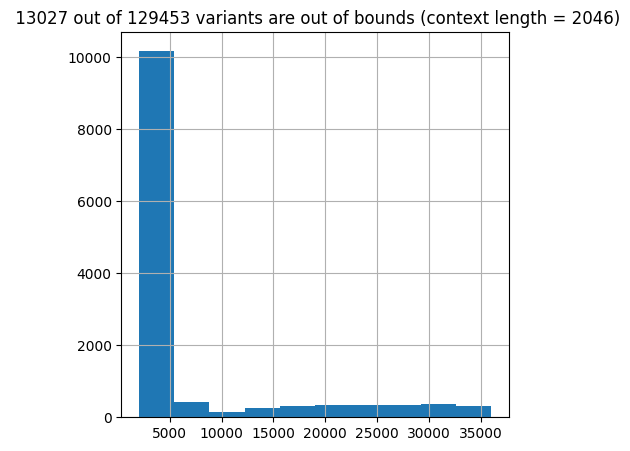

In [56]:
context_to_check = 2046
checks = check_mutation_positions(result_df.to_pandas(), context_to_check)
checks[checks["out_of_bounds"]].codon_position.hist(figsize=(5, 5))
plt.title(
    f" {checks['out_of_bounds'].sum()} out of {len(checks)} variants are out of bounds (context length = {context_to_check})"
)
plt.show()

In [57]:
# Save processed results, dset, and refseq tables
dset.write_csv(f"{OUTPUT_DIR}/clinvar_synom.csv")

# 5. CHD missense dataset

- Download the variant tables from the publication [Jin et al. Contribution of rare inherited and de novo variants in 2,871 congenital heart disease probands](https://pmc.ncbi.nlm.nih.gov/articles/PMC5675000/#SD1). 

- The excel table with variants information can be downloaded from this [link](https://pmc.ncbi.nlm.nih.gov/articles/instance/5675000/bin/NIHMS906719-supplement-supp_datasets.xlsx) 

- We saved the `S9` table (cases) as `chd_rare_mutation.csv`, and `S10` table (controls) as `chd_mutation_ctrl.csv` 


In [61]:
def load_and_filter_variants(chd_path: str) -> pd.DataFrame:
    """
    Load CHD and control cases, clean, merge, and filter to keep only missense mutations.
    """
    print("--- 1. Loading and Filtering Variants ---")
    cols = [
        "Blinded ID",
        "CHROM",
        "POS",
        "REF",
        "ALT",
        "Ensemble_GENEID",
        "Gene",
        "class",
        "Variant_Class",
        "pLI Score",
        "AA_change",
        "RadialSVM_score",
    ]

    # Load and clean pathogenic (CHD)
    pathogenic = pd.read_csv(chd_path, header=1).dropna()
    pathogenic["class"] = "chd"
    pathogenic.rename(columns={"pLI score": "pLI Score", "AA change": "AA_change"}, inplace=True)

    # Concatenate and standardize columns
    variants = pathogenic[cols]
    variants = variants.sort_values(by=["CHROM", "POS"]).reset_index(drop=True).copy()
    variants.rename(
        columns={
            "CHROM": "chrom",
            "POS": "pos",
            "REF": "ref",
            "ALT": "alt",
            "Ensemble_GENEID": "ensembl_gene_id",
            "Gene": "gene_name",
            "Variant_Class": "classification",
        },
        inplace=True,
    )

    # Format chrom and pos
    variants["chrom"] = "chr" + variants["chrom"].astype(str)
    variants["pos"] = variants["pos"].astype(int)

    # Filter missense mutations only (single base change and classification)
    initial_count = variants.shape[0]
    variants = variants.loc[
        (variants["ref"].str.len() == 1) & (variants["alt"].str.len() == 1)
    ].copy()  # single mutation only
    variants = variants.loc[variants["classification"].isin(["misD", "mis"])]  # only missense mutations
    final_count = variants.shape[0]

    variants["variant_id"] = (
        variants["chrom"] + "_" + variants["pos"].astype(str) + "_" + variants["ref"] + "_" + variants["alt"]
    )

    # Remove duplicate variants from published data
    pre_dedup = variants.shape[0]
    variants = variants.drop_duplicates(subset=["variant_id", "gene_name"], keep="first").reset_index(drop=True)
    print(
        f"Initial: {initial_count}, Missense: {final_count}, Removed {pre_dedup - variants.shape[0]} duplicates, Final: {variants.shape[0]}"
    )
    print(variants["class"].value_counts())

    return variants


chd_path = f"{DATA_DIR}/chd_rare_mutation.csv"
variants = load_and_filter_variants(chd_path)
variants.head(2)

--- 1. Loading and Filtering Variants ---
Initial: 2776, Missense: 1773, Removed 4 duplicates, Final: 1769
class
chd    1769
Name: count, dtype: int64


,Blinded ID,chrom,pos,ref,alt,ensembl_gene_id,gene_name,class,classification,pLI Score,AA_change,RadialSVM_score,variant_id
0,1-01849,chr1,898217,C,T,ENSG00000187961,KLHL17,chd,mis,0.0,p.P321L,-0.492,chr1_898217_C_T
1,1-03030,chr1,1425984,C,G,ENSG00000160072,ATAD3B,chd,mis,0.0,p.S516W,-0.917,chr1_1425984_C_G


- Load fasta and annotation file, filter the gtf table by gene names and canonical transctipts

In [62]:
def filter_canonical_gtf(gtf_s: pd.DataFrame, gtf_path: str) -> pd.DataFrame:
    """
    Filter a GTF-derived DataFrame to keep only canonical transcripts.
    Only keeps genes with explicit canonical annotations (Ensembl_canonical or MANE_Select).
    Genes without canonical annotations are dropped.
    """
    print("Filtering GTF for canonical transcripts...")
    canonical_map_pl = pl.read_csv(
        gtf_path,
        comment_prefix="#",
        separator="\t",
        has_header=False,
        columns=[2, 8],
        new_columns=["feature", "attrs"],
    ).filter(pl.col("feature") == "transcript")

    # Extract gene and transcript, then filter for canonical tags in full attrs string
    # (GTF files can have multiple tag entries, so we check the full string)
    canonical_map_pl = (
        canonical_map_pl.with_columns(
            [
                pl.col("attrs").str.extract(r'gene_name "([^"]+)"', 1).alias("gene"),
                pl.col("attrs").str.extract(r'transcript_id "([^"]+)"', 1).alias("transcript"),
            ]
        )
        # Filter for explicit canonical tags in the full attrs string
        .filter(pl.col("attrs").str.contains("Ensembl_canonical") | pl.col("attrs").str.contains("MANE_Select"))
    )

    # Prioritize MANE_Select over Ensembl_canonical if both exist for a gene
    canonical_map_pl = (
        canonical_map_pl.with_columns(
            pl.when(pl.col("attrs").str.contains("MANE_Select"))
            .then(2)
            .when(pl.col("attrs").str.contains("Ensembl_canonical"))
            .then(1)
            .otherwise(0)
            .alias("priority")
        )
        .sort("priority", descending=True)
        .group_by("gene")
        .first()
        .select(["gene", "transcript"])
    )

    genes_with_canonical = canonical_map_pl.shape[0]
    print(f"Found {genes_with_canonical} genes with explicit canonical transcripts")

    canonical_map_df = canonical_map_pl.to_pandas()
    canonical_map_df["transcript"] = canonical_map_df["transcript"].str.split(".").str[0]  # remove version
    gtf_s["transcript_id"] = gtf_s["name"].str.split(".").str[0]

    original_shape = gtf_s.shape[0]
    original_genes = gtf_s["gene_name"].nunique()

    gtf_filtered = gtf_s.merge(
        canonical_map_df, left_on=["gene_name", "transcript_id"], right_on=["gene", "transcript"], how="inner"
    ).drop(columns=["gene", "transcript"])

    filtered_genes = gtf_filtered["gene_name"].nunique()
    dropped_genes = original_genes - filtered_genes

    print(f"GTF size before canonical filter: {original_shape} entries from {original_genes} genes")
    print(f"GTF size after canonical filter: {gtf_filtered.shape[0]} entries from {filtered_genes} genes")
    print(f"Dropped {dropped_genes} genes without canonical annotations")

    return gtf_filtered


def prepare_annotations(variants: pd.DataFrame, gtf_path: str, fasta_path: str):
    """
    Load GTF/FASTA, subset GTF to genes in variant table, filter for CDS length, and canonical transcripts.
    """
    print("\n--- 2. Preparing Annotations (GTF & FASTA) ---")
    # Get reference and annotation files (hg19 assembly)
    gtf_s, fasta = process_gtf(gtf_path, fasta_path)
    # Subset GTF to genes present in the variant table (using ENSEMBL ID)
    variant_gene_ids = variants["ensembl_gene_id"].unique()
    gtf_gene_ids = gtf_s["gene_id"].unique()
    missing_gene_ids = set(variant_gene_ids) - set(gtf_gene_ids)
    if missing_gene_ids:
        print(f"⚠️ Warning: {len(missing_gene_ids)} variant Ensembl IDs are missing from the GTF table.")
        # Printing IDs is less useful, but we can print the corresponding gene names if needed
        missing_names = variants[variants["ensembl_gene_id"].isin(missing_gene_ids)]["gene_name"].unique()
        print(f"  Missing {len(missing_names)} names: {list(missing_names)}")
    gtf_subset = gtf_s[gtf_s["gene_id"].isin(variant_gene_ids)].copy()
    print(f"GTF subset to variant genes (by Ensembl ID): {gtf_subset.shape[0]} rows.")
    # Check 2: Filter for CDS length multiple of 3
    gtf_subset = gtf_subset[gtf_subset["cds"].str.len() % 3 == 0]
    print(f"After filtering CDS length multiple of 3: {gtf_subset.shape[0]}")
    # Check 3: Filter for canonical transcripts only
    gtf_filtered = filter_canonical_gtf(gtf_subset, gtf_path=gtf_path.replace(".processed.tsv", ".gtf.gz"))
    # Check 4: Validate reference allele in fasta matches variants (hg19 assembly)
    print("\nRunning FASTA reference allele validation...")
    for i in range(variants.shape[0]):
        t = variants.iloc[i]
        chrom = t["chrom"]
        pos = t["pos"]
        ref = t["ref"]
        try:
            hg19_ref = fasta[chrom][pos - 1]
            if hg19_ref != ref:
                print(f"Mismatch at {chrom}:{pos}, {ref} (variants) != {hg19_ref} (fasta), {t['variant_id']}")
        except KeyError:
            print(f"Warning: Chromosome {chrom} not found in FASTA.")
    print("FASTA reference allele validation complete.")
    return gtf_filtered, fasta

In [63]:
GTF_PROCESSED_PATH = f"{DATA_DIR}/reference/gencode.v47lift37.basic.annotation.processed.tsv"
FASTA_PATH = f"{DATA_DIR}/reference/hg19/hg19.fa"
gtf_filtered, fasta = prepare_annotations(variants=variants, gtf_path=GTF_PROCESSED_PATH, fasta_path=FASTA_PATH)


--- 2. Preparing Annotations (GTF & FASTA) ---


Processing transcripts: 100%|██████████| 64779/64779 [00:10<00:00, 6443.67it/s]


⚠️ Warning: 10 variant Ensembl IDs are missing from the GTF table.
  Missing 10 names: ['OTUD7B', 'OR8B4', 'SLCO1B7', 'CYFIP1', 'LENG9', 'ADRA2B', 'TPTE', 'SSTR3', 'ATP6AP1L', 'SLC25A53']
GTF subset to variant genes (by Ensembl ID): 6200 rows.
After filtering CDS length multiple of 3: 6181
Filtering GTF for canonical transcripts...
Found 64705 genes with explicit canonical transcripts
GTF size before canonical filter: 6181 entries from 1548 genes
GTF size after canonical filter: 1544 entries from 1544 genes
Dropped 4 genes without canonical annotations

Running FASTA reference allele validation...
FASTA reference allele validation complete.


- Get missense variant table with CDS sequences for ref and alt codons, filtered to canonical transcripts:

In [64]:
def get_results_and_filter_canonical(
    variants: pd.DataFrame, gtf_filtered: pd.DataFrame, filter_canonical: bool = True
):
    """
    Run annotation processing, merge with variant data, and filter for the canonical transcript
    for each unique variant.
    """
    print("\n--- 3. Running Annotation and Canonical Transcript Filtering ---")
    all_results = []
    chroms = variants["chrom"].unique()
    # Annotation loop
    for chrom in tqdm(chroms, desc="Processing chromosomes", total=len(chroms)):
        curr_variants = (
            variants[variants["chrom"] == chrom][["variant_id", "chrom", "pos", "ref", "alt"]].drop_duplicates().copy()
        )
        chrom_gtf = gtf_filtered[gtf_filtered["chrom"] == chrom]
        chrom_results = process_a_chrom(curr_variants, chrom_gtf, return_alt_cds=True)  # Assumed defined elsewhere
        all_results.append(chrom_results)
    all_results = pd.concat(all_results).reset_index(drop=True)
    all_results.insert(0, "id", np.arange(all_results.shape[0]))  # Add row ID
    # Merge with original variant metadata
    assembly = "hg19"
    all_results["variant_id"] = all_results["variant_id"] + "_" + assembly
    all_results = all_results.merge(variants.drop("variant_id", axis=1), on=["chrom", "pos", "ref", "alt"])
    if filter_canonical:
        print(f"Total results rows before canonical filtering: {all_results.shape[0]}")
        # Since gtf_filtered is already canonical, we can use it to filter the results.
        canonical_transcripts = gtf_filtered[["gene_name", "name"]].copy()
        canonical_transcripts.rename(columns={"name": "transcript_name"}, inplace=True)
        all_results = all_results.merge(
            canonical_transcripts,
            left_on=["gene_name", "tx_name"],  # Assumes 'transcript_name' in all_results
            right_on=["gene_name", "transcript_name"],
            how="inner",
        )
        print(f"Total results rows after canonical filtering: {all_results.shape[0]}")
    # Keep only variants where ref_aa != alt_aa
    all_results = all_results[all_results["ref_aa"] != all_results["alt_aa"]]
    print(f"Total results rows after filtering ref_aa != alt_aa: {all_results.shape[0]}")

    # Remove nonsense variants: ref_aa != "*"  &  alt_aa !="*"
    all_results = all_results[(all_results["ref_aa"] != "*") & (all_results["alt_aa"] != "*")]
    print(f"Total results rows after filtering nonsense variants: {all_results.shape[0]}")

    # Remove variants where ref_aa or all_aa are different from AA_change
    all_results = all_results[all_results["ref_aa"] == all_results["AA_change"].apply(lambda x: x[2])]
    all_results = all_results[all_results["alt_aa"] == all_results["AA_change"].apply(lambda x: x[-1])]
    print(
        f"Total results rows after filtering variants where ref_aa or alt_aa are different from provided AA_change: {all_results.shape[0]}"
    )
    return all_results

In [65]:
final_results = get_results_and_filter_canonical(variants=variants, gtf_filtered=gtf_filtered, filter_canonical=True)


--- 3. Running Annotation and Canonical Transcript Filtering ---


Processing chromosomes: 100%|██████████| 23/23 [00:00<00:00, 324.53it/s]

Total results rows before canonical filtering: 1721
Total results rows after canonical filtering: 1628
Total results rows after filtering ref_aa != alt_aa: 1624
Total results rows after filtering nonsense variants: 1624
Total results rows after filtering variants where ref_aa or alt_aa are different from provided AA_change: 1623


- Add alpha missense scores

In [66]:
af_hg19 = pl.read_csv(f"{DATA_DIR}/alphamissense_data/AlphaMissense_hg19.tsv.gz", separator="\t", skip_rows=3)
af_hg19 = af_hg19.rename({"#CHROM": "chrom", "POS": "pos", "REF": "ref", "ALT": "alt"})
af_hg19 = af_hg19.with_columns(
    pl.concat_str(
        [pl.col("chrom"), pl.col("pos").cast(str), pl.col("ref"), pl.col("alt"), pl.lit("hg19")], separator="_"
    ).alias("variant_id")
)
af_hg19 = af_hg19.with_columns(pl.col("transcript_id").str.split(".").list.first().alias("tx_name"))
# Join with final_results
final_results_pl = pl.from_pandas(final_results)
final_results = final_results_pl.join(
    af_hg19.select(["variant_id", "tx_name", "am_pathogenicity", "am_class"]), on=["variant_id", "tx_name"], how="left"
).rename({"am_pathogenicity": "AlphaMissense"})
print(
    f"Variants with AlphaMissense scores: {final_results.filter(pl.col('AlphaMissense').is_not_null()).shape[0]} / {final_results.shape[0]}"
)
final_results = final_results.to_pandas().dropna(subset=["AlphaMissense"])
final_results.head(2)

Variants with AlphaMissense scores: 1114 / 1623


,id,chrom,pos,variant_id,ref,alt,tx_name,cdsStart,cdsEnd,tx_strand,...,ensembl_gene_id,gene_name,class,classification,pLI Score,AA_change,RadialSVM_score,transcript_name,AlphaMissense,am_class
0,0,chr1,898217,chr1_898217_C_T_hg19,C,T,ENST00000338591,896073,900571,+,...,ENSG00000187961,KLHL17,chd,mis,0.0,p.P321L,-0.492,ENST00000338591,0.8814,pathogenic
2,2,chr1,3389648,chr1_3389648_C_G_hg19,C,G,ENST00000378378,3379648,3397151,+,...,ENSG00000130762,ARHGEF16,chd,mis,0.0,p.F343L,-0.963,ENST00000378378,0.8865,pathogenic


- Add DDD/ASD control variants

In [67]:
# Load ctrls
missense_variants_ddd_asd = pd.read_csv(f"{OUTPUT_DIR}/ddd_asd_zhouetal_processed_am.csv")
missense_variants_ddd_asd_ctrl = missense_variants_ddd_asd[
    missense_variants_ddd_asd["classification"] == "control"
].copy()
missense_variants_ddd_asd_ctrl["classification"] = "mis"
missense_variants_ddd_asd_ctrl["class"] = "control_ddd_asd"
print(f"Number of benign variants in DDD/ASD dataset: {missense_variants_ddd_asd_ctrl.shape[0]}")
cols = [
    "id",
    "variant_id",
    "chrom",
    "pos",
    "ref",
    "alt",
    "class",
    "ref_codon",
    "alt_codon",
    "codon_position",
    "var_rel_dist_in_cds",
    "classification",
    "ref_aa",
    "alt_aa",
    "ref_seq",
    "alt_seq",
    "tx_name",
    "AlphaMissense",
    "am_class",
]
# Concatenate
variants = pd.concat([missense_variants_ddd_asd_ctrl[cols], final_results[cols]], ignore_index=True)
print(f"\nConcatenated dataframe shape: {variants.shape}")
print(f"Columns: {variants.columns.tolist()}")
print("\nFirst few rows:")
variants.head(2)

Number of benign variants in DDD/ASD dataset: 3590

Concatenated dataframe shape: (4704, 19)
Columns: ['id', 'variant_id', 'chrom', 'pos', 'ref', 'alt', 'class', 'ref_codon', 'alt_codon', 'codon_position', 'var_rel_dist_in_cds', 'classification', 'ref_aa', 'alt_aa', 'ref_seq', 'alt_seq', 'tx_name', 'AlphaMissense', 'am_class']

First few rows:


,id,variant_id,chrom,pos,ref,alt,class,ref_codon,alt_codon,codon_position,var_rel_dist_in_cds,classification,ref_aa,alt_aa,ref_seq,alt_seq,tx_name,AlphaMissense,am_class
0,59,chr10_101163334_A_G_hg19,chr10,101163334,A,G,control_ddd_asd,GTC,GCC,283,850,mis,V,A,ATGGCACCTCCGTCAGTCTTTGCCGAGGTTCCGCAGGCCCAGCCTG...,ATGGCACCTCCGTCAGTCTTTGCCGAGGTTCCGCAGGCCCAGCCTG...,ENST00000370508,0.3736,ambiguous
1,73,chr10_101371064_G_A_hg19,chr10,101371064,G,A,control_ddd_asd,CGG,TGG,212,636,mis,R,W,ATGGAGTTGGAGGGGCGGGGTGCTGGCGGTGTGGCGGGGGGGCCGG...,ATGGAGTTGGAGGGGCGGGGTGCTGGCGGTGTGGCGGGGGGGCCGG...,ENST00000370495,0.1444,benign


- QC of the variants:


--- 4. Quality Control and Display ---
A. Initial variant type and class counts:


count
classification class                 
mis            control_ddd_asd   3590
               chd                827
misD           chd                287


B. Unique Variant Overlaps and Totals:
CHD-Control overlap (same variant_id): 0
Total unique CHD variants: 1114
Total unique Control variants: 0

Position Overlaps (same chrom:pos, potentially different alleles):
CHD-Control position overlap: 0
CHD-Control_DDD_ASD position overlap: 1
Total unique CHD positions: 1113
Total unique Control positions: 0
Total unique Control_DDD_ASD positions: 3570

C. Unique Variants and Total Rows by Class/Type:


variant_id           
                               unique_variants total_rows
class           classification                           
chd             mis                        827        827
                misD                       287        287
control_ddd_asd mis                       3573       3590


D. Final Missense-specific QC (matching original 'mis'/'misD' annotation):


variant_id           
                               unique_variants total_rows
class           classification                           
chd             mis                        827        827
                misD                       287        287
control_ddd_asd mis                       3573       3590


E. Venn Diagram - Overlap of Missense Variants Between Classes:


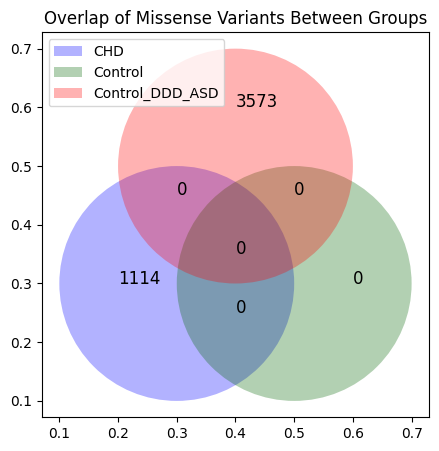


Total unique missense variants in each group:
CHD: 1114
Control: 0
Control_DDD_ASD: 3573


In [68]:
def display_qc(all_results: pd.DataFrame):
    """
    Perform and display final QC checks.
    """
    print("\n--- 4. Quality Control and Display ---")

    # A. Initial Variant Type Counts
    print("A. Initial variant type and class counts:")
    display(all_results[["classification", "class"]].value_counts().to_frame("count"))

    # B. Variant Overlaps
    chd_variants = set(all_results[all_results["class"] == "chd"]["variant_id"])
    control_variants = set(all_results[all_results["class"] == "control"]["variant_id"])

    chd_control_overlap = chd_variants & control_variants

    print("\nB. Unique Variant Overlaps and Totals:")
    print(f"CHD-Control overlap (same variant_id): {len(chd_control_overlap)}")
    print(f"Total unique CHD variants: {len(chd_variants)}")
    print(f"Total unique Control variants: {len(control_variants)}")

    # Check for position overlaps (chrom_pos)
    all_results["chrom_pos"] = all_results["chrom"].astype(str) + ":" + all_results["pos"].astype(str)
    chd_positions = set(all_results[all_results["class"] == "chd"]["chrom_pos"])
    control_positions = set(all_results[all_results["class"] == "control"]["chrom_pos"])
    control_ddd_asd_positions = set(all_results[all_results["class"] == "control_ddd_asd"]["chrom_pos"])
    position_overlap = chd_positions & control_positions
    position_overlap_ddd_asd = chd_positions & control_ddd_asd_positions
    print("\nPosition Overlaps (same chrom:pos, potentially different alleles):")
    print(f"CHD-Control position overlap: {len(position_overlap)}")
    print(f"CHD-Control_DDD_ASD position overlap: {len(position_overlap_ddd_asd)}")
    print(f"Total unique CHD positions: {len(chd_positions)}")
    print(f"Total unique Control positions: {len(control_positions)}")
    print(f"Total unique Control_DDD_ASD positions: {len(control_ddd_asd_positions)}")

    if len(position_overlap) > 0:
        print(f"  Note: {len(position_overlap)} positions have variants in both CHD and Control groups")

    # C. Unique and Total Rows by Class and Variant Type
    print("\nC. Unique Variants and Total Rows by Class/Type:")
    variant_counts = (
        all_results.groupby(["class", "classification"])
        .agg({"variant_id": ["nunique", "count"]})
        .rename(columns={"nunique": "unique_variants", "count": "total_rows"})
    )
    display(variant_counts)

    # D. Final Missense-specific QC
    print("\nD. Final Missense-specific QC (matching original 'mis'/'misD' annotation):")
    final_qc_counts = (
        all_results.groupby(["class", "classification"])
        .agg({"variant_id": ["nunique", "count"]})
        .rename(columns={"nunique": "unique_variants", "count": "total_rows"})
    )
    display(final_qc_counts)

    # E. Venn Diagram for Missense Variants Overlap
    print("\nE. Venn Diagram - Overlap of Missense Variants Between Classes:")
    # Get sets of variant IDs for each group (missense only)
    chd_varids = set(all_results[(all_results["class"] == "chd")]["variant_id"].unique())
    control_varids = set(all_results[(all_results["class"] == "control")]["variant_id"].unique())
    control_ddd_asd_varids = set(all_results[(all_results["class"] == "control_ddd_asd")]["variant_id"].unique())
    # Create Venn diagram using matplotlib circles
    plt.figure(figsize=(5, 5))
    # Create three circles
    circle1 = plt.Circle((0.3, 0.3), 0.2, alpha=0.3, fc="blue", label="CHD")
    circle2 = plt.Circle((0.5, 0.3), 0.2, alpha=0.3, fc="darkgreen", label="Control")
    circle3 = plt.Circle((0.4, 0.5), 0.2, alpha=0.3, fc="red", label="Control_DDD_ASD")
    plt.gca().add_patch(circle1)
    plt.gca().add_patch(circle2)
    plt.gca().add_patch(circle3)
    # Add counts in appropriate locations
    # Unique to each set
    plt.text(0.2, 0.3, str(len(chd_varids - control_varids - control_ddd_asd_varids)), fontsize=12)
    plt.text(0.6, 0.3, str(len(control_varids - chd_varids - control_ddd_asd_varids)), fontsize=12)
    plt.text(0.4, 0.6, str(len(control_ddd_asd_varids - chd_varids - control_varids)), fontsize=12)
    # Pairwise overlaps
    plt.text(0.4, 0.25, str(len(chd_varids & control_varids - control_ddd_asd_varids)), fontsize=12)  # CHD & Control
    plt.text(
        0.3, 0.45, str(len(chd_varids & control_ddd_asd_varids - control_varids)), fontsize=12
    )  # CHD & Control_DDD_ASD
    plt.text(
        0.5, 0.45, str(len(control_varids & control_ddd_asd_varids - chd_varids)), fontsize=12
    )  # Control & Control_DDD_ASD
    # Three-way overlap
    plt.text(0.4, 0.35, str(len(chd_varids & control_varids & control_ddd_asd_varids)), fontsize=12)

    plt.xlim(0, 1)
    plt.ylim(0, 1)
    plt.title("Overlap of Missense Variants Between Groups")
    plt.legend()
    plt.axis("equal")
    plt.show()
    print("\nTotal unique missense variants in each group:")
    print("CHD:", len(chd_varids))
    print("Control:", len(control_varids))
    print("Control_DDD_ASD:", len(control_ddd_asd_varids))

    return all_results  # Return final processed table


# 4. run the filter and display qc
_ = display_qc(variants)

- Save to disk

In [ ]:
# Keep only the controls from the DDD/ASD dataset and CHD cases:
mask = variants["class"].isin(["control_ddd_asd", "chd"])
variants = variants[mask].copy()
# rename control_ddd_asd to control
variants.loc[variants["class"] == "control_ddd_asd", "class"] = "control"
variants.to_csv(f"{OUTPUT_DIR}/chd_dnm_filtered_canonical_transcripts_ddd_asd_ctrls_am_scores.csv", index=False)


- Add features: pLI, phlop, cds length, cds_frac

In [70]:
def process_variant_features(variants, pli_file_path, phylop_bw_path):
    """
    Add pLI, PhyloP conservation scores, and CDS features to variant data.
    """

    # Read gnomAD pLI metrics by transcript (not by gene)
    df_pli = pl.from_pandas(pd.read_csv(pli_file_path, sep="\t"))
    # Select relevant columns and process
    df_pli = df_pli.select(["transcript", "pLI"])
    df_pli = df_pli.with_columns(pl.col("transcript").str.split(".").list.first().alias("transcript"))

    # Add pLI scores by transcript to variants
    variants_pl = pl.from_pandas(variants)
    variants_pl = variants_pl.with_columns(pl.col("tx_name").str.split(".").list.first().alias("tx_name_clean"))
    variants_pl = variants_pl.join(df_pli, left_on="tx_name_clean", right_on="transcript", how="left")

    # Create pLI bins (multiply by 10 and cast to int)
    variants_pl = variants_pl.with_columns((pl.col("pLI") * 10).cast(pl.Int32).alias("pLI_bin"))
    print(
        f"Variants with pLI scores: {variants_pl.filter(pl.col('pLI').is_not_null()).shape[0]} / {variants_pl.shape[0]}"
    )

    # Add PhyloP conservation scores
    print("\nAdding PhyloP scores from bigWig file...")
    bw = pyBigWig.open(phylop_bw_path)
    phylop = []
    for row in tqdm(variants_pl.rows(named=True), total=variants_pl.shape[0]):
        try:
            phylop_score = bw.values(row["chrom"], row["pos"] - 1, row["pos"])[0]
            phylop.append(phylop_score if phylop_score is not None else -1000)
        except:
            phylop.append(-1000)
    bw.close()

    # Add phylop column and create bins
    variants_pl = variants_pl.with_columns(pl.Series(values=phylop, name="phylop").fill_nan(-1000))
    variants_pl = variants_pl.with_columns(pl.col("phylop").round().cast(pl.Int32).alias("phylop_bin"))
    print(
        f"Variants with PhyloP scores: {variants_pl.filter(pl.col('phylop') != -1000).shape[0]} / {variants_pl.shape[0]}"
    )

    # Add cds length and cds offset fraction
    variants_pl = variants_pl.with_columns(pl.col("ref_seq").str.len_chars().alias("cds_length"))
    variants_pl = variants_pl.with_columns(
        (pl.col("var_rel_dist_in_cds") / pl.col("cds_length")).alias("cds_offset_frac")
    )
    variants_pl = variants_pl.with_columns(
        (pl.col("cds_offset_frac") * 10).cast(pl.Int32).alias("cds_offset_frac_bin")
    )

    # Convert back to pandas for further analysis
    return variants_pl.to_pandas()


phylop_bw_path = f"{DATA_DIR}/reference/hg19.100way.phyloP100way.bw"
pli_file_path = f"{DATA_DIR}/reference/gnomad.v2.1.1.lof_metrics.by_transcript.txt"

chd_variants_with_ddd_controls = process_variant_features(variants, pli_file_path, phylop_bw_path)
ddd_asd_variants = process_variant_features(
    missense_variants_ddd_asd[missense_variants_ddd_asd["classification"] != "control"], pli_file_path, phylop_bw_path
)

Variants with pLI scores: 4680 / 4704

Adding PhyloP scores from bigWig file...


100%|██████████| 4704/4704 [00:00<00:00, 27221.87it/s]

Variants with PhyloP scores: 4702 / 4704


Variants with pLI scores: 31606 / 31738

Adding PhyloP scores from bigWig file...


100%|██████████| 31738/31738 [00:00<00:00, 40671.22it/s]


Variants with PhyloP scores: 31738 / 31738


In [71]:
chd_variants_with_ddd_controls.head(2)

,id,variant_id,chrom,pos,ref,alt,class,ref_codon,alt_codon,codon_position,...,am_class,chrom_pos,tx_name_clean,pLI,pLI_bin,phylop,phylop_bin,cds_length,cds_offset_frac,cds_offset_frac_bin
0,59,chr10_101163334_A_G_hg19,chr10,101163334,A,G,control,GTC,GCC,283,...,ambiguous,chr10:101163334,ENST00000370508,0.001157,0.0,5.229,5,1242,0.684380,6
1,73,chr10_101371064_G_A_hg19,chr10,101371064,G,A,control,CGG,TGG,212,...,benign,chr10:101371064,ENST00000370495,0.929540,9.0,3.016,3,1095,0.580822,5


In [72]:
ddd_asd_variants.head(2)

,id,variant_id,tx_name,variant_type,chrom,pos,ref,alt,cdsStart,cdsEnd,...,AlphaMissense,am_class,tx_name_clean,pLI,pLI_bin,phylop,phylop_bin,cds_length,cds_offset_frac,cds_offset_frac_bin
0,0,chr10_100011447_C_T_hg19,ENST00000260702,missense,chr10,100011447,C,T,100008677,100022776,...,0.1004,benign,ENST00000260702,9.191200e-20,0.0,4.771,5,2271,0.864377,8
1,1,chr10_100017561_C_G_hg19,ENST00000260702,missense,chr10,100017561,C,G,100008677,100022776,...,0.1315,benign,ENST00000260702,9.191200e-20,0.0,4.867,5,2271,0.486570,4


In [75]:
# Save to disk
chd_variants_with_ddd_controls.to_csv(
    f"{OUTPUT_DIR}/chd_dnm_filtered_canonical_transcripts_ddd_asd_ctrls_am_scores_cds_features.csv", index=False
)

# 6. COSMIC synonymous analyses data

This will include the processing of COSMIC variants and gnomAD common variants

In [77]:
import os

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import polars as pl
import pyfaidx
import seaborn as sns


# Output file paths
COSMIC_OUTPUT_FILE = f"{OUTPUT_DIR}/cosmic_mutantcensus_gencode_v47_canonical.csv"
GNOMAD_OUTPUT_FILE = f"{OUTPUT_DIR}/gnomad_af0.01_canonical_genes.csv"

cosmic_dir = f"{DATA_DIR}/cosmic/cosmic_raw"
cosmic_files = {
    "cosmic_samples": f"{cosmic_dir}/Cosmic_Sample_v102_GRCh38.tsv.gz",
    "cosmic_mutant_census": f"{cosmic_dir}/Cosmic_MutantCensus_v102_GRCh38.tsv.gz",
    "hg38": f"{DATA_DIR}/reference/hg38/hg38.fa",
}

import os


gnomad_dir = f"{DATA_DIR}/gnomad"
gnomad_files = {
    "gnomad_exomes": f"{gnomad_dir}/gnomad.exomes.v4.1",
    "gnomad_genomes": f"{gnomad_dir}/gnomad.genomes.v4.1",
}
gencode_v47_file = f"{DATA_DIR}/reference/gencode.v47.basic.annotation.processed.filtered.tsv"
hg38 = {}
with pyfaidx.Fasta(cosmic_files["hg38"]) as f:
    for k in f.keys():
        hg38[k] = f[k][:].seq


valid_chroms = ["chr" + str(x) for x in range(1, 23)]

In [78]:
def map_variants_to_genes_by_exons_efficient(
    genes_df, variants_df, variant_columns=["pos", "ref", "alt", "af", "ac", "an"]
):
    """
    Efficient mapping using sorted variants and binary search for range queries.
    """
    import bisect

    gene_variant_mapping = {}

    print(f"Processing {len(genes_df)} genes and {len(variants_df)} variants...")

    # Pre-sort variants by chromosome and position for efficient range queries
    chrom_sorted_variants = {}
    unique_chroms = variants_df.select("chrom").unique().to_series().to_list()

    for chrom in unique_chroms:
        chrom_variants = variants_df.filter(pl.col("chrom") == chrom).sort("pos")
        if len(chrom_variants) > 0:
            # Extract positions and variant data separately for efficient binary search
            positions = chrom_variants.select("pos").to_series().to_numpy() - 1
            variant_data = chrom_variants.select(variant_columns).to_dicts()
            chrom_sorted_variants[chrom] = (positions, variant_data)

    # Process genes
    for gene_row in genes_df.iter_rows(named=True):
        id = gene_row["id"]
        chrom = gene_row["chrom"]
        strand = gene_row["strand"]
        cds_seq = gene_row["cds_sequence"]

        gene_variant_mapping[id] = {"variants": []}

        if chrom not in chrom_sorted_variants:
            continue

        positions, variant_data = chrom_sorted_variants[chrom]

        # Parse exon coordinates
        exon_starts = gene_row["exonStarts"]
        exon_ends = gene_row["exonEnds"]
        cds_start = gene_row["cdsStart"]
        cds_end = gene_row["cdsEnd"]

        if exon_starts and exon_ends:
            if isinstance(exon_starts, str):
                starts = [int(x.strip()) for x in exon_starts.split(",") if x.strip()]
            else:
                starts = [int(exon_starts)]

            if strand == "-":
                assert starts[0] == cds_start, f"{cds_start}, {starts[0]}, {gene_row['id']}, {gene_row['gene_id']}"
                starts[0] = cds_start

            if isinstance(exon_ends, str):
                ends = [int(x.strip()) for x in exon_ends.split(",") if x.strip()]
            else:
                ends = [int(exon_ends)]
            if strand == "+":
                assert ends[-1] == cds_end, f"{cds_end}, {ends[-1]}, {gene_row['id']}, {gene_row['gene_id']}"
                ends[-1] = cds_end
        else:
            raise ValueError(f"No exon coordinates found for gene {id}")
        assert starts[0] == cds_start and ends[-1] == cds_end
        # Use binary search to find variants in each exon range
        cum_left = 0
        for start, end in zip(starts, ends):
            # Find range of variants within [start, end] using binary search
            left_idx = bisect.bisect_left(positions, start)
            right_idx = bisect.bisect_left(positions, end)

            # Extract variants in this range
            for i in range(left_idx, right_idx):
                variant = variant_data[i].copy()
                variant["chrom"] = chrom
                variant["exon_start"] = start
                variant["exon_end"] = end
                dist_left = cum_left + variant["pos"] - 1 - start
                dist_in_cds = dist_left if strand == "+" else len(cds_seq) - dist_left - 1
                variant["dist_left"] = dist_left
                variant["dist_in_cds"] = dist_in_cds
                codon_start = dist_in_cds // 3 * 3
                variant["ref_codon"] = cds_seq[codon_start : codon_start + 3]
                alt_codon = []
                for j in range(3):
                    if j + codon_start != dist_in_cds:
                        alt_codon.append(variant["ref_codon"][j])
                    else:
                        if strand == "+":
                            assert variant["ref"].upper() == cds_seq[j + codon_start].upper()
                            alt_codon.append(variant["alt"].upper())
                        else:
                            assert variant["ref"].upper() == reverse_complement_dna(cds_seq[j + codon_start]).upper()
                            alt_codon.append(reverse_complement_dna(variant["alt"].upper()))
                variant["alt_codon"] = "".join(alt_codon)
                gene_variant_mapping[id]["variants"].append(variant)
            cum_left += end - start

    return gene_variant_mapping


def get_alt_seq(row):
    ref_seq, ref_codon, alt_codon, codon_pos = (
        row["ref_seq"],
        row["ref_codon"],
        row["alt_codon"],
        row["codon_position"],
    )
    assert codon_pos >= 0 and codon_pos < len(ref_seq) / 3
    assert ref_seq[codon_pos * 3 : (codon_pos + 1) * 3] == ref_codon
    alt_seq = ref_seq[: codon_pos * 3] + alt_codon + ref_seq[(codon_pos + 1) * 3 :]
    return alt_seq


def convert_gene_variant_mapping_to_df(gene_variant_mapping, genes, extra_cols=[]):
    # Flatten gene_variant_mapping into a list of variant dicts, each with gene id
    variant_rows = []
    for row_id, info in gene_variant_mapping.items():
        for variant in info["variants"]:
            row = variant.copy()
            row["row_id"] = row_id
            variant_rows.append(row)

    gene_variant_df = pd.DataFrame(variant_rows)
    gene_variant_df["codon_pos"] = gene_variant_df["dist_in_cds"] // 3

    # Compute ref_aa and alt_aa columns
    gene_variant_df["ref_aa"] = gene_variant_df["ref_codon"].apply(lambda c: codon_to_aa(c) if pd.notnull(c) else None)
    gene_variant_df["alt_aa"] = gene_variant_df["alt_codon"].apply(lambda c: codon_to_aa(c) if pd.notnull(c) else None)

    # Compute is_synonymous column
    gene_variant_df["is_synonymous"] = gene_variant_df.apply(
        lambda row: (
            row["ref_aa"] == row["alt_aa"]
            if pd.notnull(row["ref_aa"]) and pd.notnull(row["alt_aa"]) and (row["ref_aa"] != "*")
            else False
        ),
        axis=1,
    )

    gene_variant_df = pl.from_pandas(gene_variant_df)

    temp = gene_variant_df.with_columns(pl.col("row_id").cast(pl.Int64)).join(
        genes.select(["id", "gene_name", "name", "gene_id", "cds_sequence", "strand"]), left_on="row_id", right_on="id"
    )
    cols_to_select = [
        "chrom",
        "pos",
        "ref",
        "alt",
        "ref_codon",
        "alt_codon",
        "gene_name",
        "gene_id",
        "cds_sequence",
        "strand",
        "codon_pos",
        "dist_in_cds",
    ]
    if extra_cols:
        cols_to_select += [x for x in extra_cols if x not in ["chrom", "pos", "ref", "alt"]]
    temp = temp.select(cols_to_select)
    result = (
        temp.sort("chrom", "pos")
        .with_row_index("id")
        .rename({"cds_sequence": "ref_seq", "codon_pos": "codon_position", "dist_in_cds": "var_rel_dist_in_cds"})
    )

    result = result.with_columns(
        pl.struct(pl.col("ref_seq"), pl.col("ref_codon"), pl.col("alt_codon"), pl.col("codon_position"))
        .map_elements(get_alt_seq, return_dtype=pl.Utf8)
        .alias("alt_seq")
    )

    return result

In [84]:
genes = pl.read_csv(gencode_v47_file, separator="\t")
genes.head()
genes = (
    genes.filter(pl.col("is_canonical"))
    .filter(pl.col("length_divisible_by_3"))
    .filter(pl.col("has_start_codon"))
    .filter(pl.col("has_stop_codon"))
)
genes = genes.with_row_index("id")
genes.head()
genes["is_canonical"].sum()

19310

In [85]:
genes

shape: (19_310, 22)
┌───────┬─────────────┬────────────┬───────┬───┬────────────┬────────────┬────────────┬────────────┐
│ id    ┆ gene_id     ┆ name       ┆ chrom ┆ … ┆ has_stop_c ┆ length_div ┆ has_intern ┆ cds_length │
│ ---   ┆ ---         ┆ ---        ┆ ---   ┆   ┆ odon       ┆ isible_by_ ┆ al_stop_co ┆ ---        │
│ u64   ┆ str         ┆ str        ┆ str   ┆   ┆ ---        ┆ 3          ┆ dons       ┆ i64        │
│       ┆             ┆            ┆       ┆   ┆ bool       ┆ ---        ┆ ---        ┆            │
│       ┆             ┆            ┆       ┆   ┆            ┆ bool       ┆ bool       ┆            │
╞═══════╪═════════════╪════════════╪═══════╪═══╪════════════╪════════════╪════════════╪════════════╡
│ 0     ┆ ENSG0000018 ┆ ENST000006 ┆ chr1  ┆ … ┆ true       ┆ true       ┆ false      ┆ 981        │
│       ┆ 6092.7      ┆ 41515.2    ┆       ┆   ┆            ┆            ┆            ┆            │
│ 1     ┆ ENSG0000028 ┆ ENST000003 ┆ chr1  ┆ … ┆ true       ┆ true     

### COSMIC

In [86]:
# Keep only WGS and WXS samples
cosmic_samples = pl.read_csv(cosmic_files["cosmic_samples"], separator="\t")
cosmic_wxs_samples = (
    cosmic_samples.filter((pl.col("WHOLE_GENOME_SCREEN") == "y") | (pl.col("WHOLE_EXOME_SCREEN") == "y"))[
        "COSMIC_SAMPLE_ID"
    ]
    .unique()
    .to_list()
)
len(cosmic_wxs_samples)

49970

In [87]:
columns = [
    "MUTATION_ID",
    "GENE_SYMBOL",
    "TRANSCRIPT_ACCESSION",
    "MUTATION_CDS",
    "MUTATION_AA",
    "MUTATION_DESCRIPTION",
    "CHROMOSOME",
    "GENOME_START",
    "GENOME_STOP",
    "STRAND",
    "HGVSP",
    "HGVSC",
    "HGVSG",
    "GENOMIC_WT_ALLELE",
    "GENOMIC_MUT_ALLELE",
]


# %%
data = pl.read_csv(cosmic_files["cosmic_mutant_census"], infer_schema_length=100000, separator="\t")
data = data.with_columns(
    pl.col("CHROMOSOME").map_elements(
        lambda x: str(int(float(x))) if x not in ["X", "Y"] else x, return_dtype=pl.String
    )
)
data = data.with_columns(pl.col("GENOME_START").cast(pl.Int64))
data = data.with_columns(pl.col("GENOME_STOP").cast(pl.Int64))
print(0, data.height)
data = data.filter(pl.col("COSMIC_SAMPLE_ID").is_in(cosmic_wxs_samples))

## Each row is a variant in a sample, so need to group by variant across samples.
num_samples = data.group_by("HGVSC").len("num_samples")
somatic = data.filter(pl.col("MUTATION_SOMATIC_STATUS") == "Confirmed somatic variant")["HGVSC"].unique().to_list()
data_grouped = data.group_by(columns).first().select(columns)
data_grouped = data_grouped.with_columns(pl.col("HGVSC").is_in(somatic).alias("somatic"))
data_grouped = data_grouped.join(num_samples, on="HGVSC", how="left")
data_grouped = data_grouped.with_columns(
    pl.col("GENOMIC_WT_ALLELE").alias("ref"), pl.col("GENOMIC_MUT_ALLELE").alias("alt")
)
data_grouped = data_grouped.filter((pl.col("ref").str.len_chars() == 1) & (pl.col("alt").str.len_chars() == 1))
data_grouped = data_grouped.filter(pl.col("ref") != pl.col("alt"))
print(2, data_grouped.height)
data_grouped = data_grouped.with_columns(
    ("chr" + pl.col("CHROMOSOME")).alias("chrom"), (pl.col("GENOME_START")).cast(pl.Int64).alias("pos")
)
data_grouped = data_grouped.filter(pl.col("chrom").is_in(valid_chroms))
print(3, data_grouped.height)
data_grouped = data_grouped.unique()
print(4, data_grouped.height)

0 2004598
2 953793
3 923499
4 923499


In [88]:
cols = [x for x in data_grouped.columns if x != "chrom"]
gene_variant_mapping = map_variants_to_genes_by_exons_efficient(genes, data_grouped, variant_columns=cols)
result = convert_gene_variant_mapping_to_df(gene_variant_mapping, genes, cols)

result = result.filter(pl.col("GENE_SYMBOL") == pl.col("gene_name"))
result = result.filter(pl.col("ref_seq").str.len_chars() % 3 == 0)
result.write_csv(COSMIC_OUTPUT_FILE)

Processing 19310 genes and 923499 variants...


### gnomAD common variants

#### The gnomad data need to be downloaded from https://gnomad.broadinstitute.org/
To convert the vcf files to tsv files, run the following command with `bcftools`.
```
bcftools query -f '\''%CHROM\t%POS\t%REF\t%ALT\t%AF\t%AC\t%AN\n'\'' \
  -i '\''TYPE="snp" & FILTER="PASS"'\'' \
  "gnomad.<exomes|genomes>.v4.1.sites.<chrom>.vcf.bgz" | \
  gzip > "<chrom>.tsv.gz"
```

The `<exomes|genomes>` and `<chrom>` need to be replaced by the actual names.

In [89]:
# get all variants from gnomAD, including exome and genome
exome_variants = []
for chrom in [f"chr{i}" for i in range(1, 23)] + ["chrX", "chrY"]:
    variants = pl.read_csv(
        os.path.join(gnomad_files["gnomad_exomes"], f"{chrom}.tsv.gz"), separator="\t", has_header=False
    )
    exome_variants.append(variants)
exome_variants = pl.concat(exome_variants)
exome_variants.columns = ["chrom", "pos", "ref", "alt", "af", "ac", "an"]
exome_variants = exome_variants.filter(pl.col("an") > 100000)

genome_variants = []
for chrom in [f"chr{i}" for i in range(1, 23)] + ["chrX", "chrY"]:
    variants = pl.read_csv(
        os.path.join(gnomad_files["gnomad_genomes"], f"{chrom}.tsv.gz"), separator="\t", has_header=False
    )
    genome_variants.append(variants)
genome_variants = pl.concat(genome_variants)
genome_variants.columns = ["chrom", "pos", "ref", "alt", "af", "ac", "an"]
genome_variants = genome_variants.filter(pl.col("an") > 25000)

all_variants = (
    pl.concat([exome_variants, genome_variants])
    .sort("af", descending=True)
    .unique(subset=["chrom", "pos", "ref", "alt"], keep="first")
)

In [90]:
common_variants = all_variants.filter(pl.col("af") > 0.01).sort(["chrom", "pos"])
cols = ["pos", "ref", "alt", "af", "ac", "an"]
gene_variant_mapping = map_variants_to_genes_by_exons_efficient(genes, common_variants, variant_columns=cols)

result = convert_gene_variant_mapping_to_df(gene_variant_mapping, genes, cols)
result = result.filter(pl.col("ref_seq").str.len_chars() % 3 == 0)
result.write_csv(GNOMAD_OUTPUT_FILE)

Processing 19310 genes and 12910000 variants...
